<a href="https://colab.research.google.com/github/DavideRosatelli/Intrusion-Detection-System-Data-Poisoning/blob/main/Thesis_poisonlabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import sklearn
import itertools
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
y_multi_train = pd.read_csv("y_multi_train.csv")
y_multi_test = pd.read_csv("y_multi_test.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
#dictionaries for final plots
res_log=dict()
res_rf_b=dict()
res_xgb_b=dict()
res_nn_b=dict()
res_tree=dict()
res_rf_m=dict()
res_xgb_m=dict()
res_nn_m=dict()

15% label flipped

In [ ]:
a, b = np.split(y_train, [int(.15*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod1 = pd.concat([a, b], axis=0)
y_train_mod1

label
20656       0
10021       0
6725        0
18623       1
3027        1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [ ]:
a, b = np.split(y_multi_train, [int(.15*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod1 = pd.concat([a, b], axis=0)
y_multi_train_mod1

attack_cat
20656            0
10021            0
6725             0
18623            3
3027             7
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.891776826457167
score on train: 0.8433760064878643
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     30772
           1       0.87      0.98      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.91      0.86      0.88     85028
weighted avg       0.90      0.89      0.89     85028



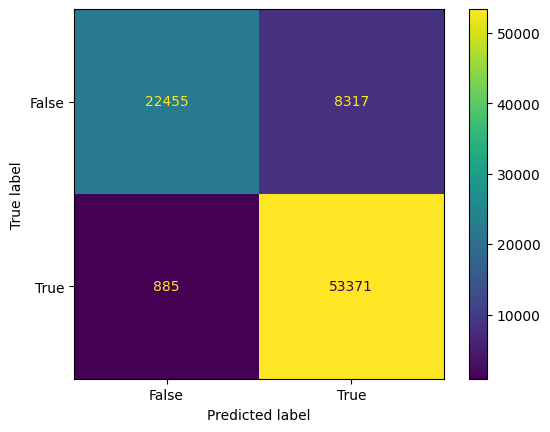

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod1)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['15%']=acc

AUC: 0.9622


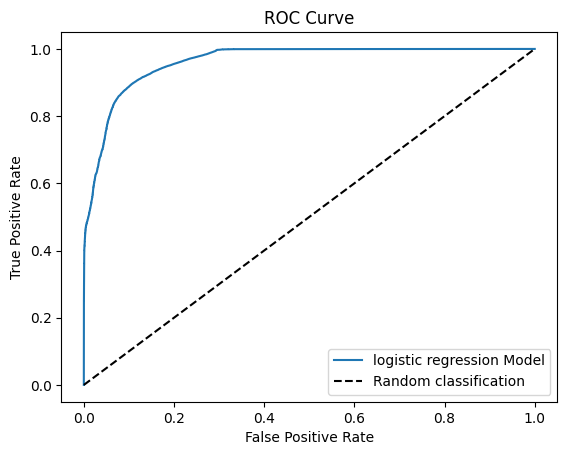

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-9-6d20d432a98a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod1)


score on test: 0.9430540527826128
score on train: 0.8989051729131669
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     30772
           1       0.92      0.99      0.96     54256

    accuracy                           0.94     85028
   macro avg       0.95      0.92      0.94     85028
weighted avg       0.95      0.94      0.94     85028



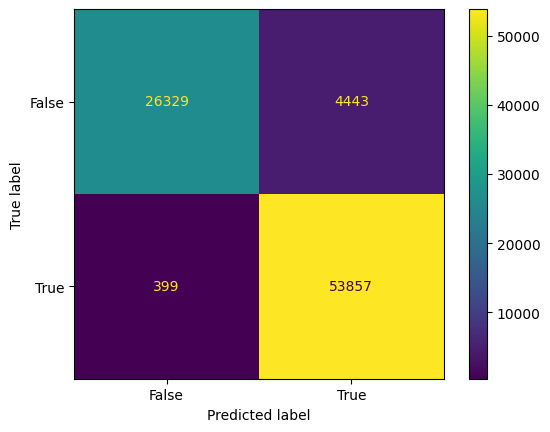

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod1)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['15%']=acc

AUC: 0.9903


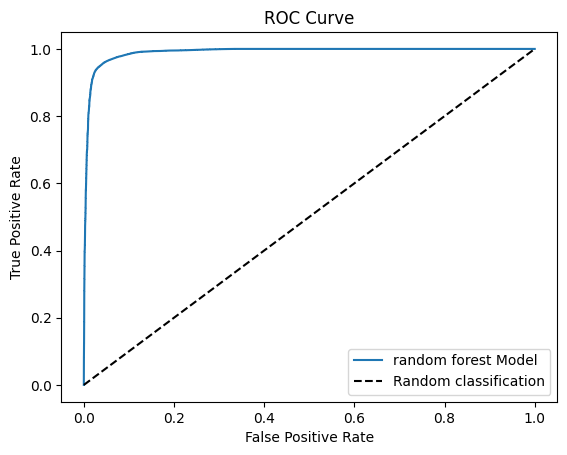

In [ ]:
# ROC curve and AUC
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9657877405090088
score on train: 0.920286161153913
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     30772
           1       0.97      0.98      0.97     54256

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.96     85028
weighted avg       0.97      0.97      0.97     85028



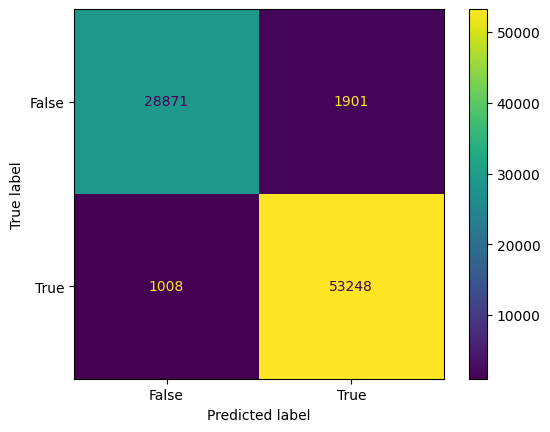

In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod1)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['15%']=acc

AUC: 0.9941


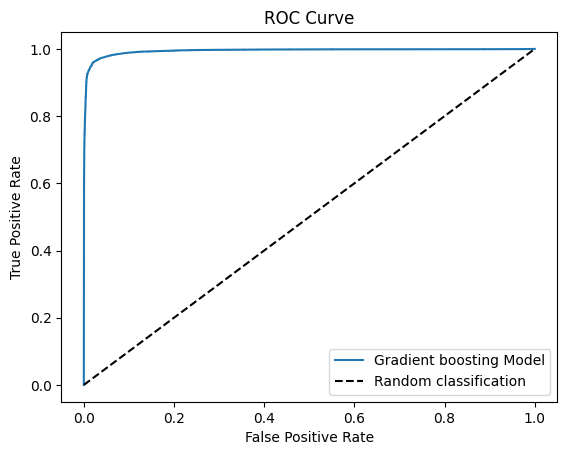

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.3553 - accuracy: 0.8596 - f1_m: 0.8925 - precision_m: 0.8733 - recall_m: 0.9147
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.3328 - accuracy: 0.8737 - f1_m: 0.9015 - precision_m: 0.8958 - recall_m: 0.9086
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.3266 - accuracy: 0.8788 - f1_m: 0.9052 - precision_m: 0.9020 - recall_m: 0.9097
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.3225 - accuracy: 0.8826 - f1_m: 0.9079 - precision_m: 0.9069 - recall_m: 0.9101
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.8876 - f1_m: 0.9119 - precision_m: 0.9099 - recall_m: 0.9150
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.3103 - accuracy: 0.8924 - f1_m: 0.9156 - precision_m: 0.9133 - recall_m: 0.9189
Epoch 7/100
1349/1349 [=======================

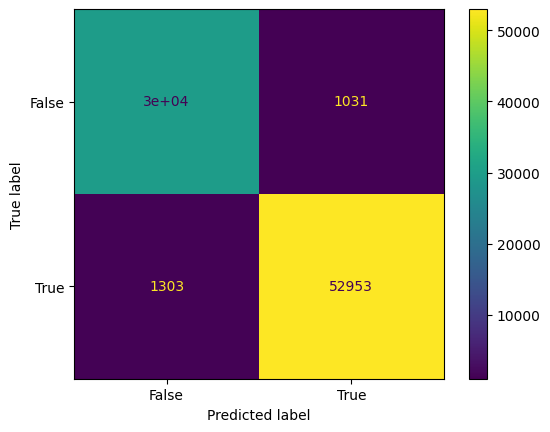

In [ ]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import callbacks
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod1, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod1)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
res_nn_b['15%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

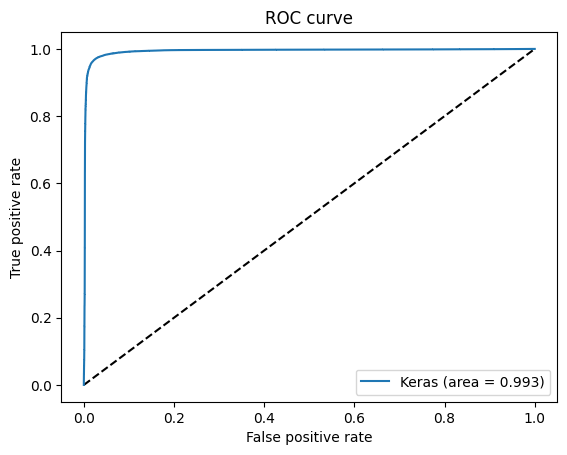

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
attack_cat=['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Analysis', 'Backdoor', 'Shellcode', 'Worms']
import numpy as np
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

score on test: 0.5252975490426683
score on train: 0.7409778138214679
              precision    recall  f1-score   support

           0       0.72      0.95      0.82     30772
           1       0.20      0.00      0.01     19423
           2       0.36      0.61      0.45     14709
           3       0.38      0.52      0.44      7921
           4       0.19      0.07      0.10      5357
           5       0.75      0.37      0.50      4578
           6       0.00      0.01      0.00       909
           7       0.45      0.04      0.08       780
           8       0.34      0.28      0.31       513
           9       0.00      0.00      0.00        66

    accuracy                           0.53     85028
   macro avg       0.34      0.29      0.27     85028
weighted avg       0.46      0.53      0.45     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


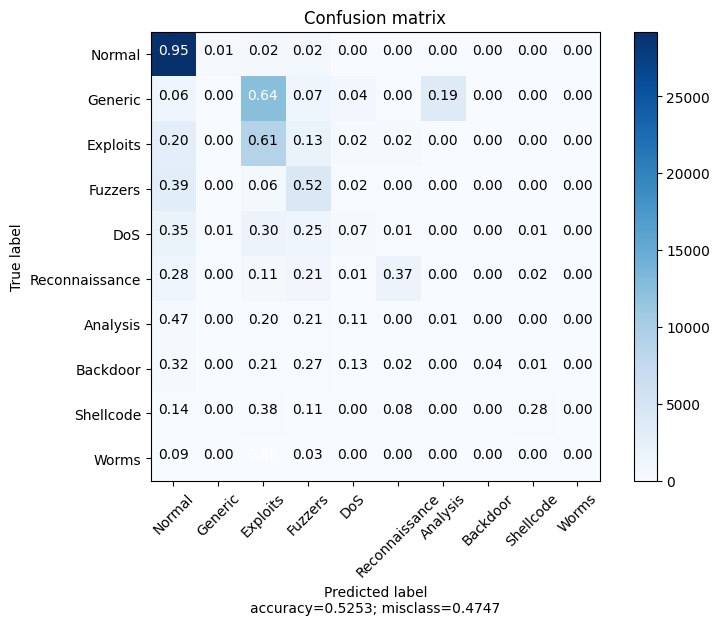

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod1)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['15%']=acc

In [ ]:
import yellowbrick
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    # Creating visualization
    visualizer = ROCAUC(model)
    # Fitting to the training data first then scoring with the test data
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    return visualizer

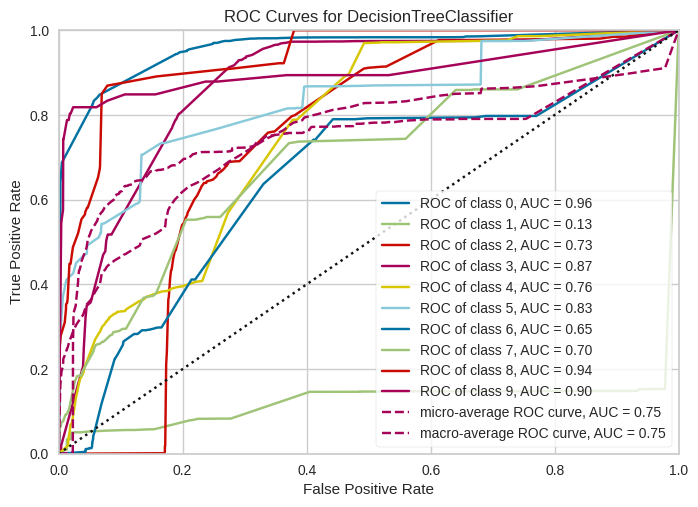

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod1, X_test, y_multi_test)

<ipython-input-20-772d5696187c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod1)


score on test: 0.7154113938937762
score on train: 0.7397671320164514
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     30772
           1       1.00      0.62      0.77     19423
           2       0.56      0.92      0.70     14709
           3       0.32      0.49      0.39      7921
           4       0.57      0.01      0.03      5357
           5       0.93      0.39      0.55      4578
           6       0.00      0.00      0.00       909
           7       1.00      0.00      0.01       780
           8       1.00      0.01      0.02       513
           9       0.00      0.00      0.00        66

    accuracy                           0.72     85028
   macro avg       0.62      0.34      0.33     85028
weighted avg       0.76      0.72      0.69     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


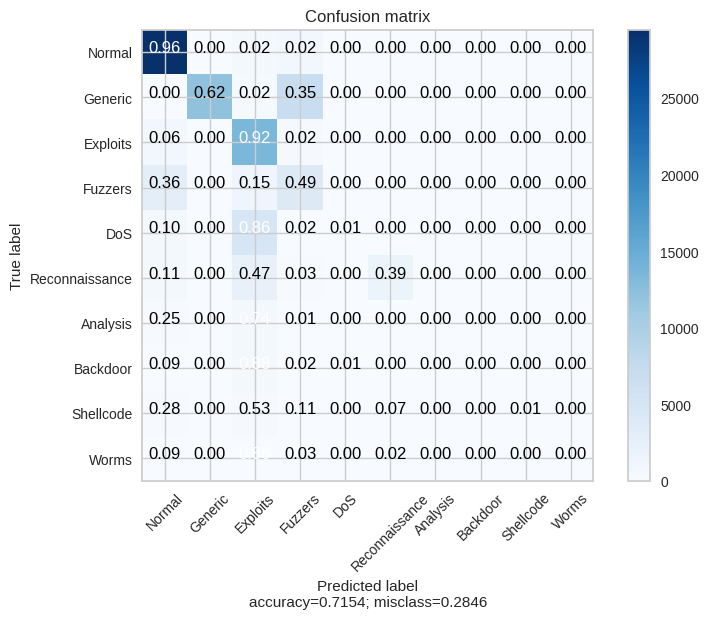

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod1)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['15%']=acc

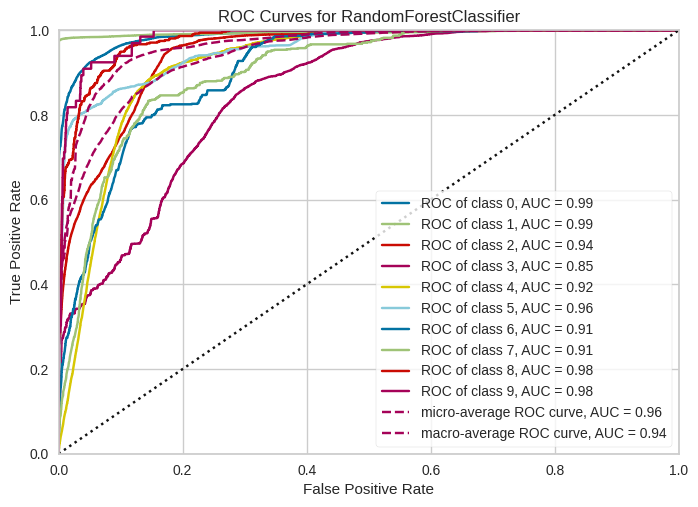

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod1, X_test, y_multi_test)

score on test: 0.6103048407583385
score on train: 0.7911602850026067
              precision    recall  f1-score   support

           0       0.72      0.97      0.82     30772
           1       0.83      0.03      0.06     19423
           2       0.47      0.89      0.62     14709
           3       0.53      0.78      0.63      7921
           4       0.42      0.08      0.13      5357
           5       0.88      0.31      0.46      4578
           6       0.76      0.07      0.14       909
           7       0.48      0.05      0.09       780
           8       0.55      0.32      0.41       513
           9       1.00      0.06      0.11        66

    accuracy                           0.61     85028
   macro avg       0.66      0.36      0.35     85028
weighted avg       0.67      0.61      0.51     85028



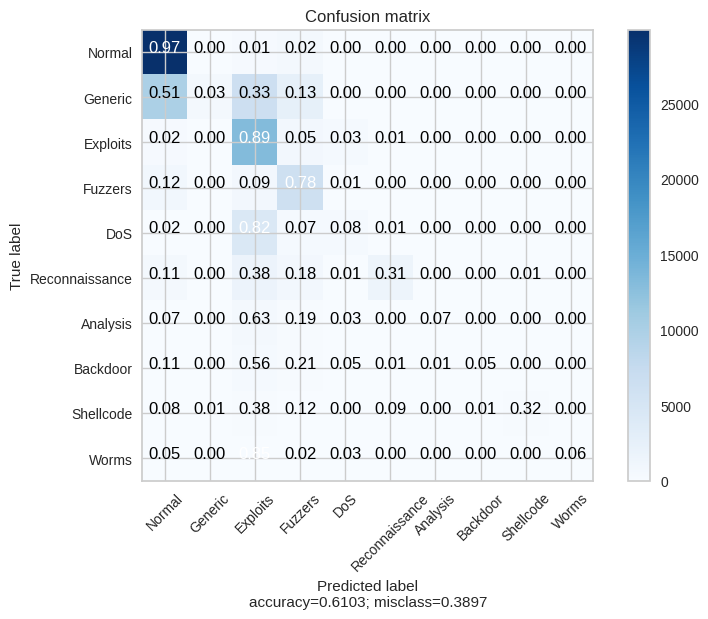

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod1)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['15%']=acc

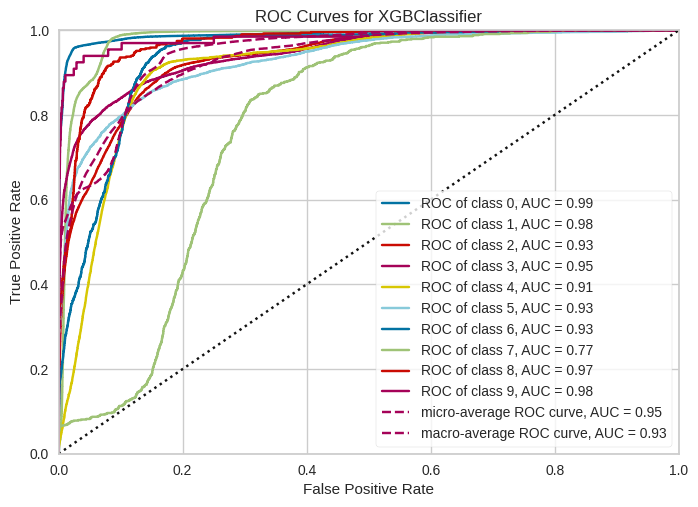

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod1, X_test, y_multi_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5504      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.0209 - accuracy: 0.6766 - f1_m: 1.6126 - precision_m: 3135656.2500 - recall_m: 1.6091
Epoch 2/100
1349/

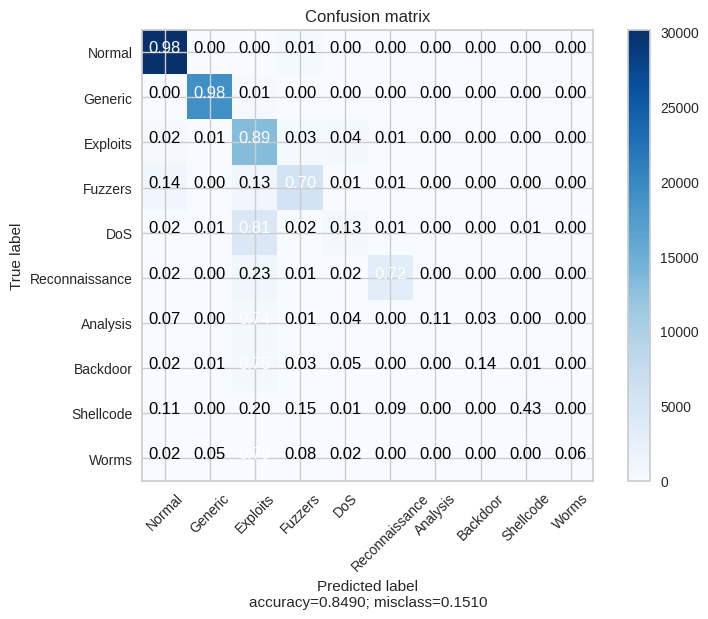

In [ ]:
from keras import metrics
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod1,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod1)[1]))
scores = model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['15%']=scores[1]
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.74722524028923


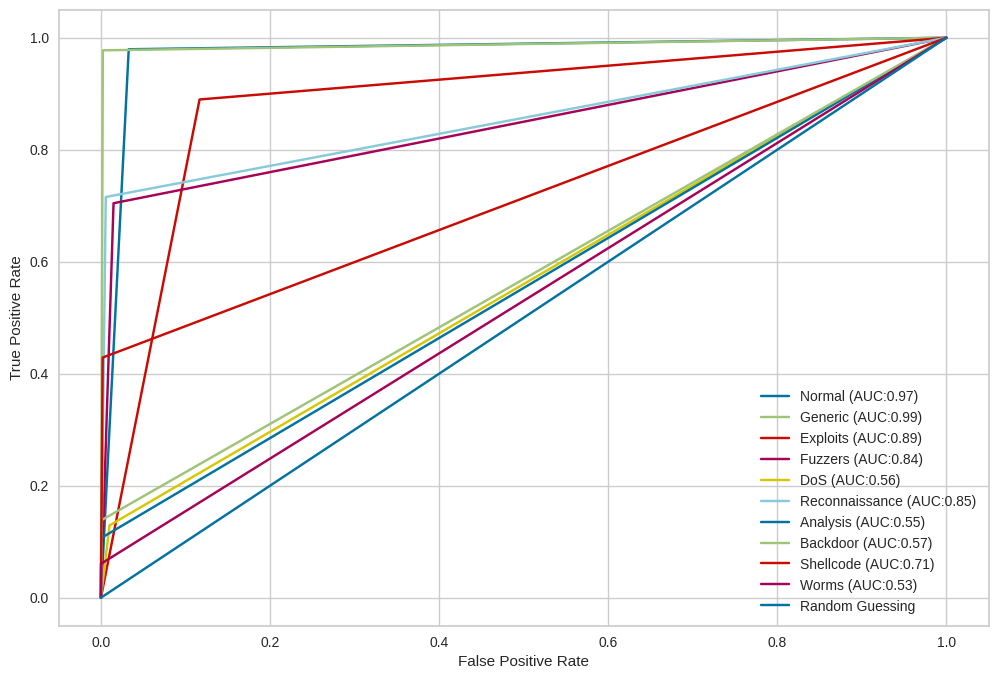

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
from sklearn.preprocessing import LabelBinarizer

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(attack_cat):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

30% label flipped

In [ ]:
a, b = np.split(y_train, [int(.3*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod2 = pd.concat([a, b], axis=0)
y_train_mod2

label
19959       1
46428       0
18670       1
41070       1
39584       0
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [ ]:
a, b = np.split(y_multi_train, [int(.3*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod2 = pd.concat([a, b], axis=0)
y_multi_train_mod2

attack_cat
19959            7
46428            0
18670            1
41070            3
39584            0
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8895540292609493
score on train: 0.7948908069281121
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     30772
           1       0.86      0.99      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.92      0.85      0.87     85028
weighted avg       0.90      0.89      0.88     85028



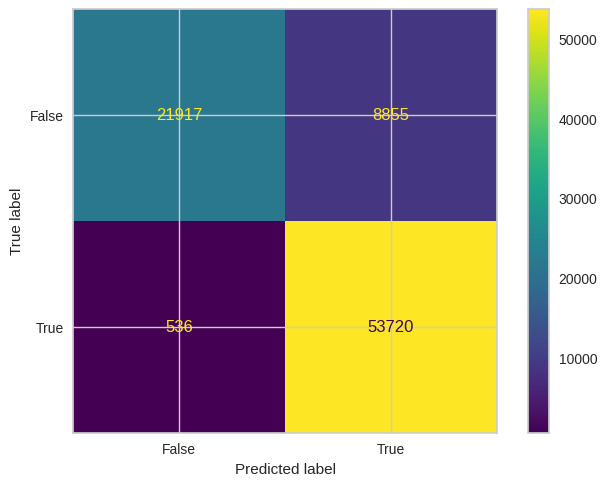

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod2)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['30%']=acc

AUC: 0.9610


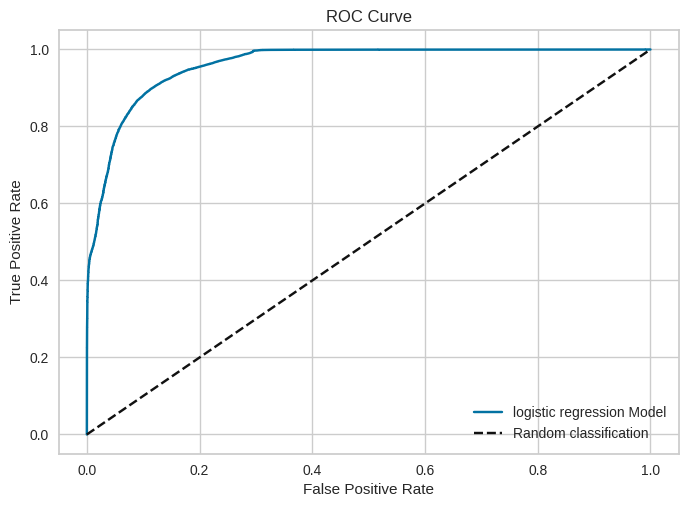

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-30-8778a8c18b90>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod2)


score on test: 0.9211553841087642
score on train: 0.8341887273359208
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     30772
           1       0.89      1.00      0.94     54256

    accuracy                           0.92     85028
   macro avg       0.94      0.89      0.91     85028
weighted avg       0.93      0.92      0.92     85028



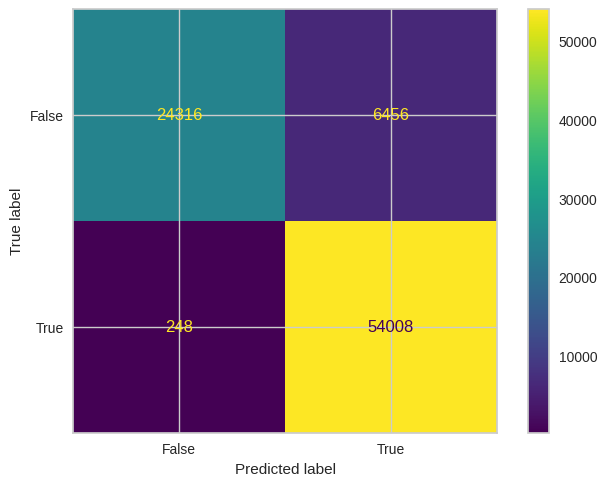

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod2)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['30%']=acc

AUC: 0.9810


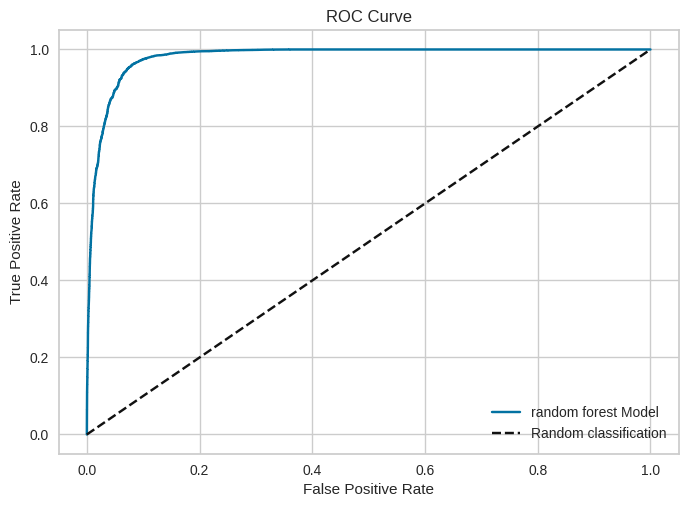

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9582608082043562
score on train: 0.8535885998957308
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     30772
           1       0.96      0.98      0.97     54256

    accuracy                           0.96     85028
   macro avg       0.96      0.95      0.95     85028
weighted avg       0.96      0.96      0.96     85028



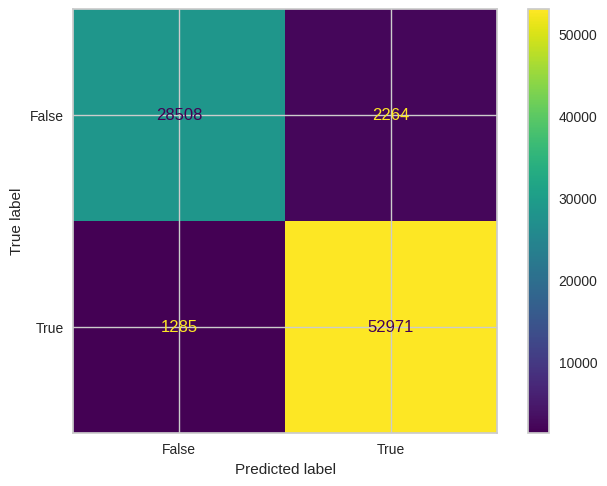

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod2)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['30%']=acc

AUC: 0.9857


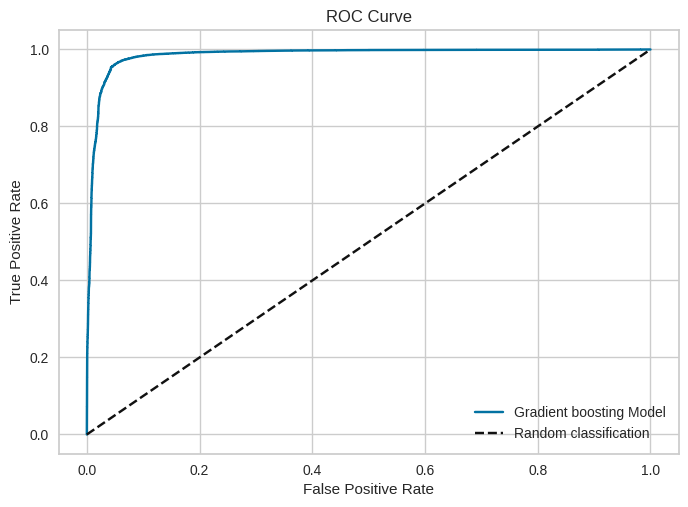

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.4653 - accuracy: 0.8031 - f1_m: 0.8506 - precision_m: 0.8203 - recall_m: 0.8869
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.4498 - accuracy: 0.8137 - f1_m: 0.8565 - precision_m: 0.8409 - recall_m: 0.8749
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.4445 - accuracy: 0.8188 - f1_m: 0.8597 - precision_m: 0.8478 - recall_m: 0.8738
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.4405 - accuracy: 0.8233 - f1_m: 0.8629 - precision_m: 0.8533 - recall_m: 0.8745
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.4361 - accuracy: 0.8280 - f1_m: 0.8663 - precision_m: 0.8576 - recall_m: 0.8767
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.4334 - accuracy: 0.8301 - f1_m: 0.8678 - precision_m: 0.8598 - recall_m: 0.8774
Epoch 7/100
1349/1349 [=======================

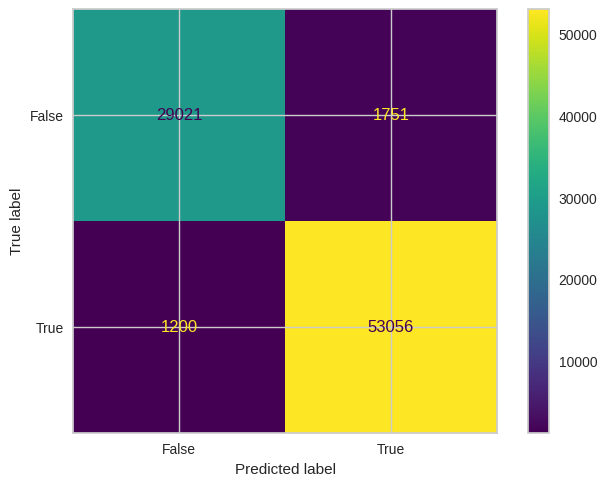

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod2, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod2)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
res_nn_b['30%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

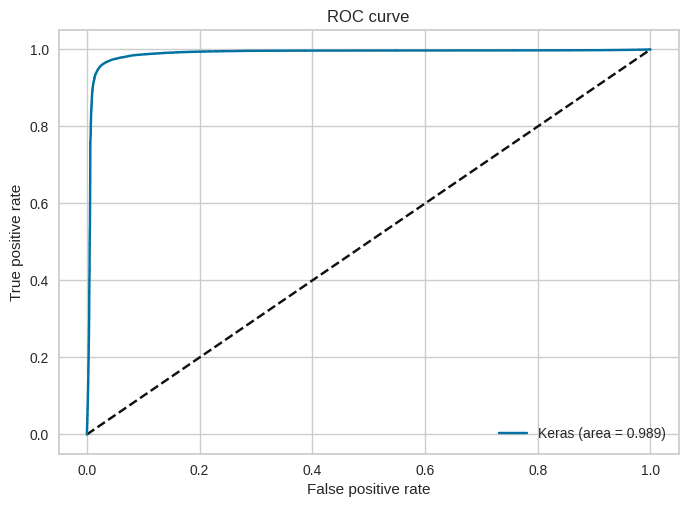

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.5339652820247448
score on train: 0.6478248276661067
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     30772
           1       0.43      0.00      0.01     19423
           2       0.40      0.91      0.56     14709
           3       0.16      0.34      0.22      7921
           4       0.44      0.05      0.10      5357
           5       0.84      0.11      0.19      4578
           6       0.06      0.00      0.01       909
           7       0.39      0.03      0.06       780
           8       0.22      0.14      0.17       513
           9       0.39      0.11      0.17        66

    accuracy                           0.53     85028
   macro avg       0.42      0.26      0.24     85028
weighted avg       0.58      0.53      0.46     85028



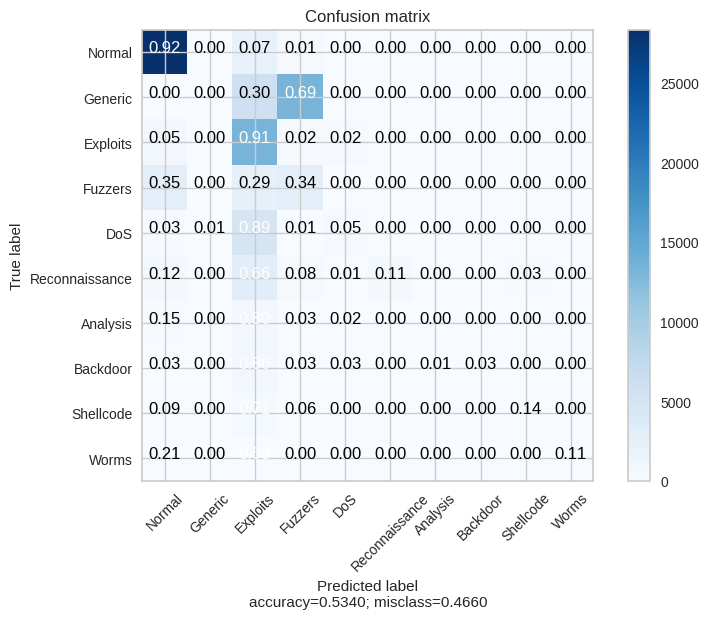

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod2)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['30%']=acc

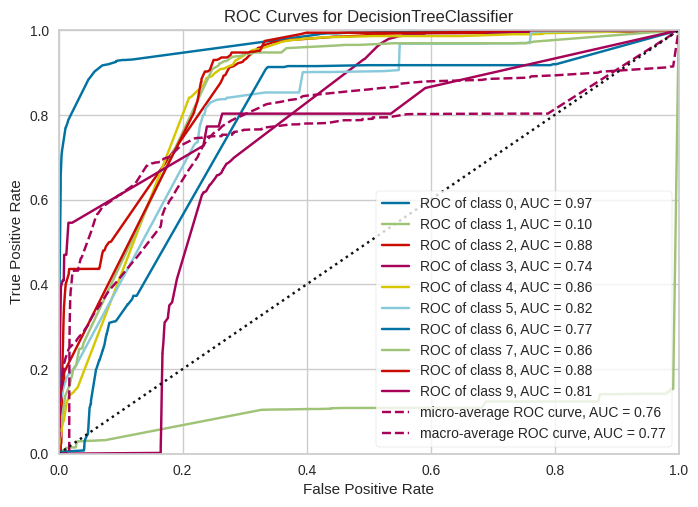

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod2, X_test, y_multi_test)

<ipython-input-38-a517557e8012>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod2)


score on test: 0.7570447382038857
score on train: 0.6534785379134566
              precision    recall  f1-score   support

           0       0.73      0.98      0.84     30772
           1       1.00      0.96      0.98     19423
           2       0.60      0.84      0.70     14709
           3       0.69      0.39      0.50      7921
           4       0.86      0.01      0.01      5357
           5       0.90      0.03      0.06      4578
           6       1.00      0.00      0.01       909
           7       1.00      0.00      0.00       780
           8       1.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.76     85028
   macro avg       0.78      0.32      0.31     85028
weighted avg       0.79      0.76      0.70     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


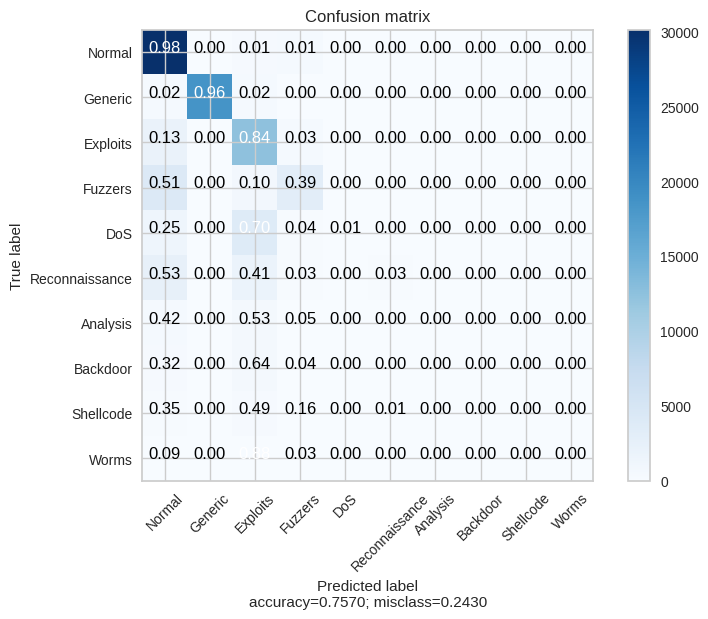

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod2)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['30%']=acc

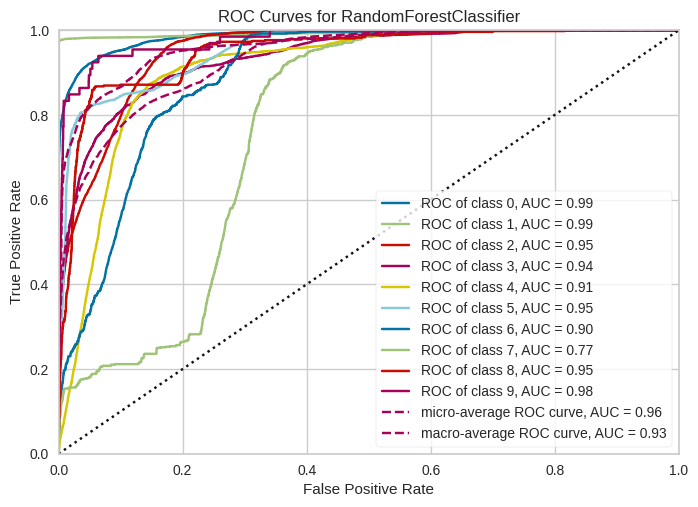

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod2, X_test, y_multi_test)

score on test: 0.5892999952956673
score on train: 0.6945142790940161
              precision    recall  f1-score   support

           0       0.55      0.98      0.71     30772
           1       0.21      0.01      0.01     19423
           2       0.64      0.80      0.71     14709
           3       0.71      0.71      0.71      7921
           4       0.40      0.09      0.15      5357
           5       0.82      0.35      0.49      4578
           6       0.75      0.07      0.12       909
           7       0.84      0.05      0.10       780
           8       0.57      0.26      0.36       513
           9       0.67      0.03      0.06        66

    accuracy                           0.59     85028
   macro avg       0.62      0.34      0.34     85028
weighted avg       0.51      0.59      0.49     85028



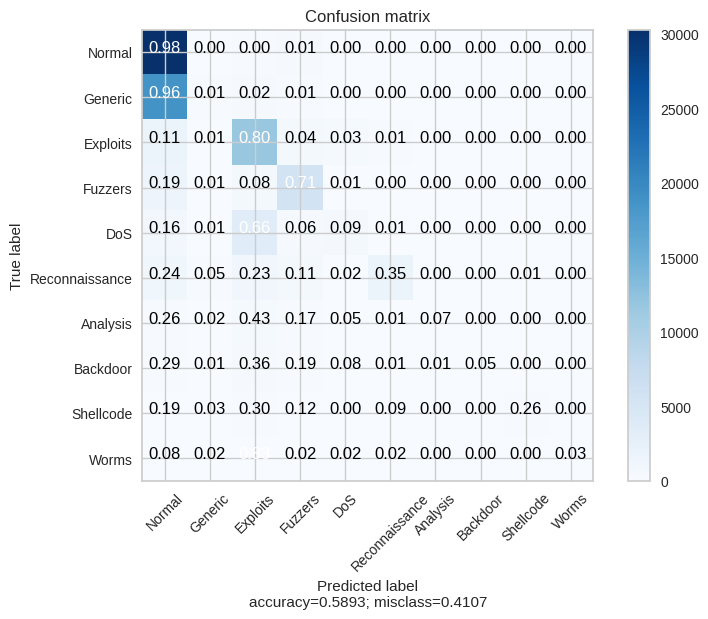

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod2)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['30%']=acc

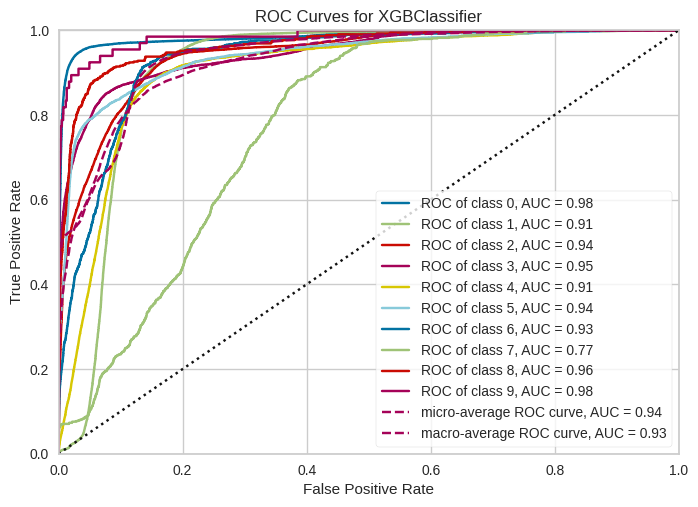

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod2, X_test, y_multi_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               5504      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.2571 - accuracy: 0.5961 - f1_m: 1.6979 - precision_m: 2950333.5000 - recall_m: 1.6200
Epoch 2/100
1349/

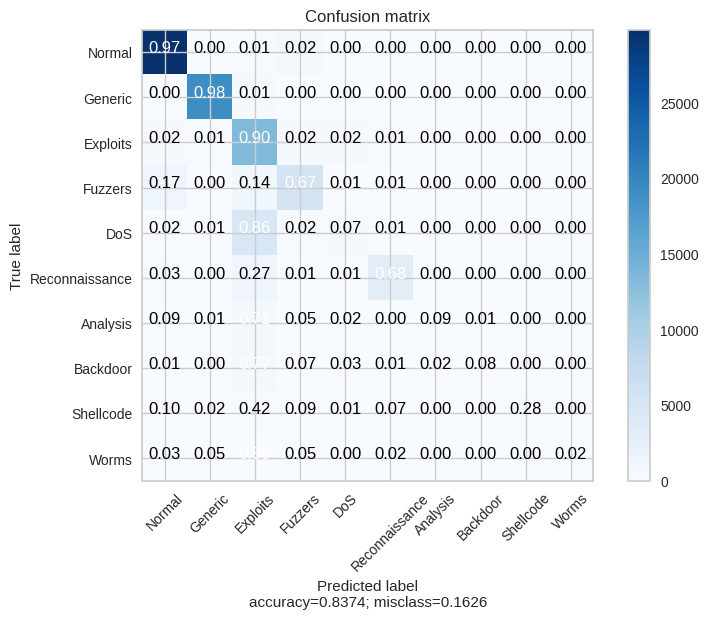

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod2,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['30%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod2)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.7268339419172307


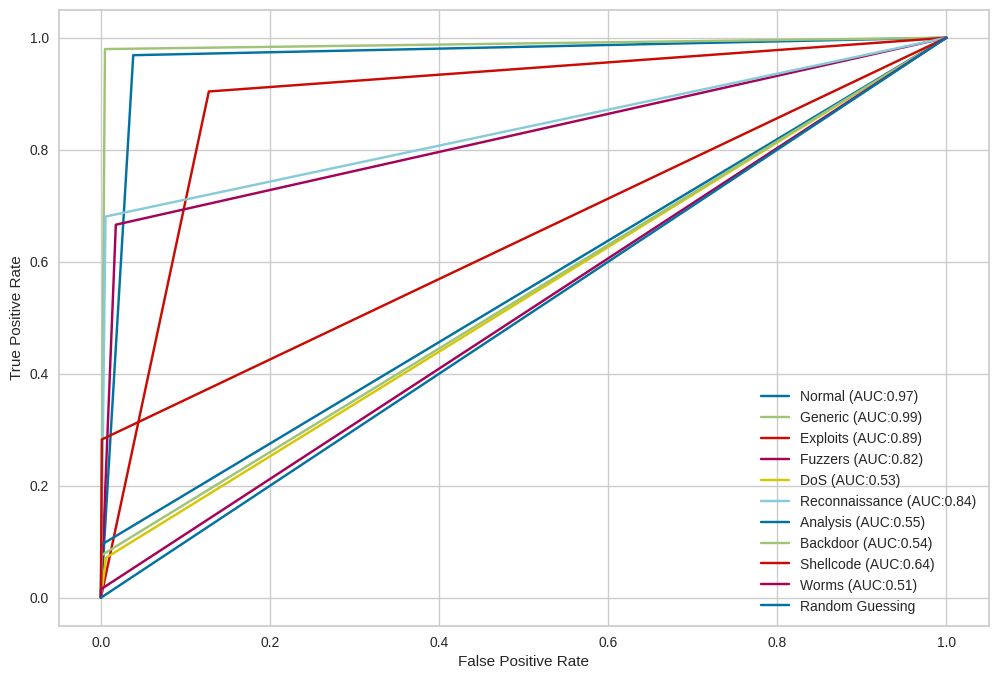

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

45% label flipped

In [ ]:
a, b = np.split(y_train, [int(.45*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod3 = pd.concat([a, b], axis=0)
y_train_mod3

label
74293       1
8247        1
60577       0
47773       0
36340       1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [ ]:
a, b = np.split(y_multi_train, [int(.45*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod3 = pd.concat([a, b], axis=0)
y_multi_train_mod3

attack_cat
74293            3
8247             2
60577            0
47773            0
36340            3
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8892835301312508
score on train: 0.7459132248160807
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     30772
           1       0.86      0.99      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.92      0.85      0.87     85028
weighted avg       0.90      0.89      0.88     85028



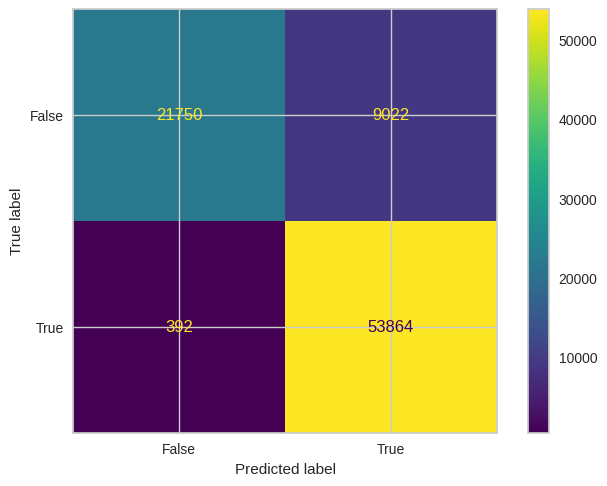

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod3)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['45%']=acc

AUC: 0.9608


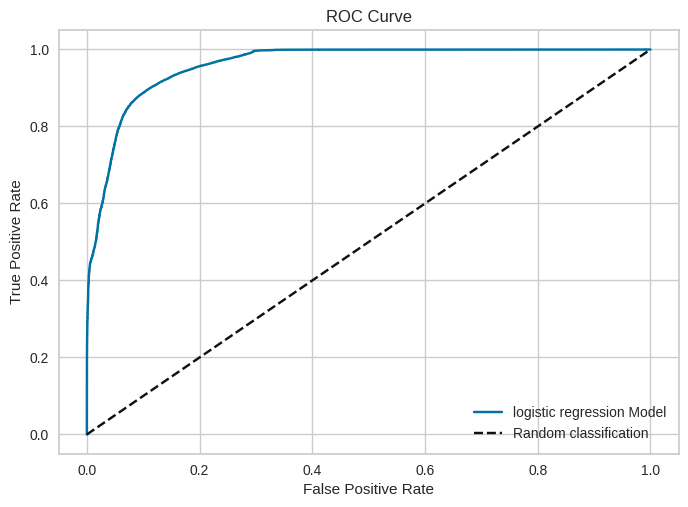

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-48-a93217f62095>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod3)


score on test: 0.9179917203744649
score on train: 0.7727277993396281
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     30772
           1       0.89      1.00      0.94     54256

    accuracy                           0.92     85028
   macro avg       0.94      0.89      0.91     85028
weighted avg       0.93      0.92      0.92     85028



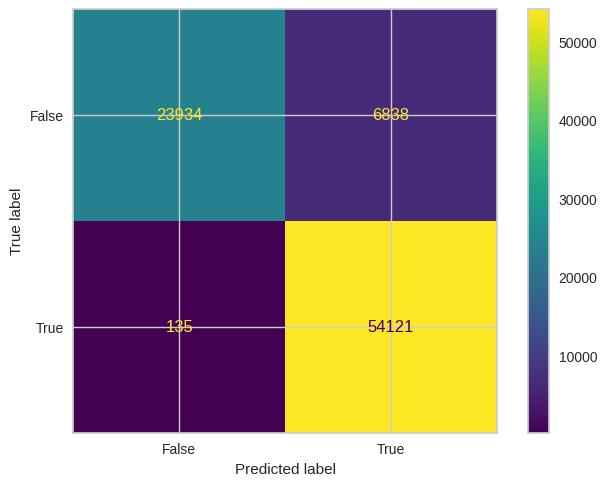

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod3)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['45%']=acc

AUC: 0.9907


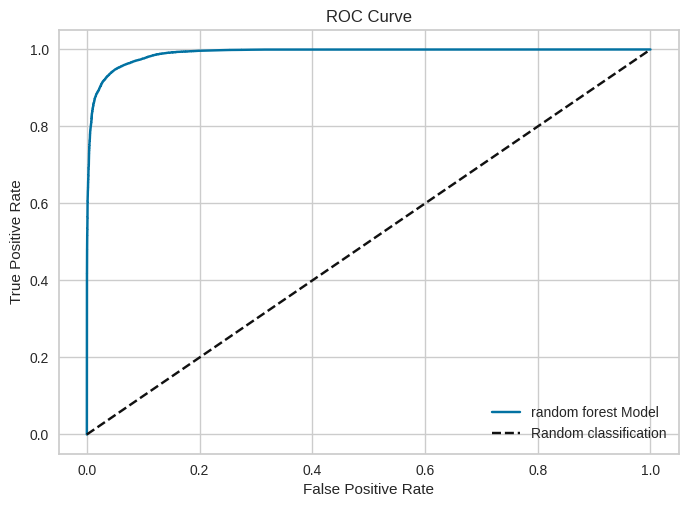

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9565790092675354
score on train: 0.7893124022475815
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     30772
           1       0.97      0.97      0.97     54256

    accuracy                           0.96     85028
   macro avg       0.95      0.95      0.95     85028
weighted avg       0.96      0.96      0.96     85028



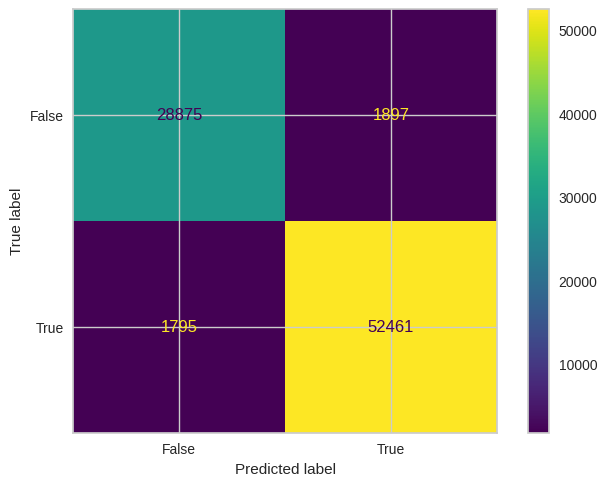

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod3)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['45%']=acc

AUC: 0.9863


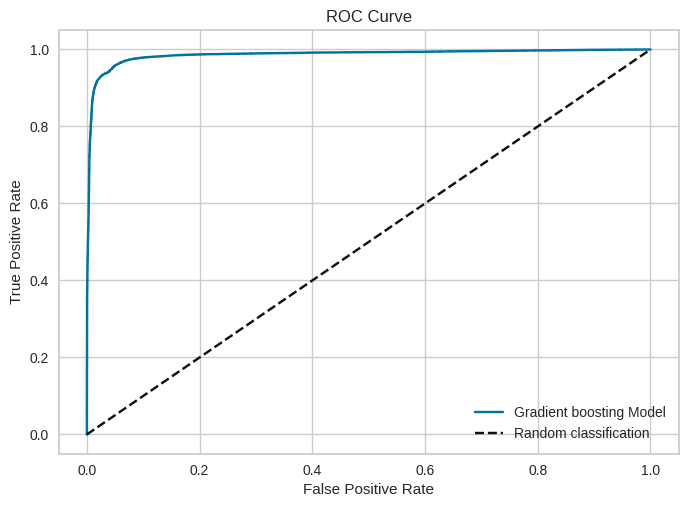

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.5457 - accuracy: 0.7478 - f1_m: 0.8136 - precision_m: 0.7691 - recall_m: 0.8663
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7536 - f1_m: 0.8148 - precision_m: 0.7821 - recall_m: 0.8526
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5324 - accuracy: 0.7562 - f1_m: 0.8150 - precision_m: 0.7891 - recall_m: 0.8450
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7589 - f1_m: 0.8160 - precision_m: 0.7950 - recall_m: 0.8402
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5288 - accuracy: 0.7600 - f1_m: 0.8161 - precision_m: 0.7977 - recall_m: 0.8376
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5277 - accuracy: 0.7612 - f1_m: 0.8166 - precision_m: 0.7997 - recall_m: 0.8363
Epoch 7/100
1349/1349 [=======================

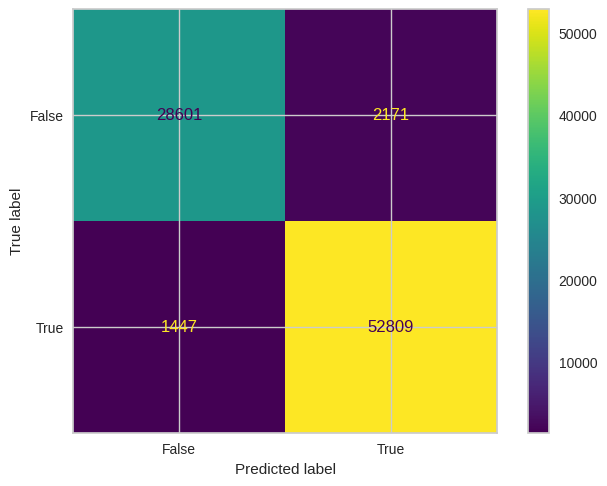

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod3, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod3)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['45%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

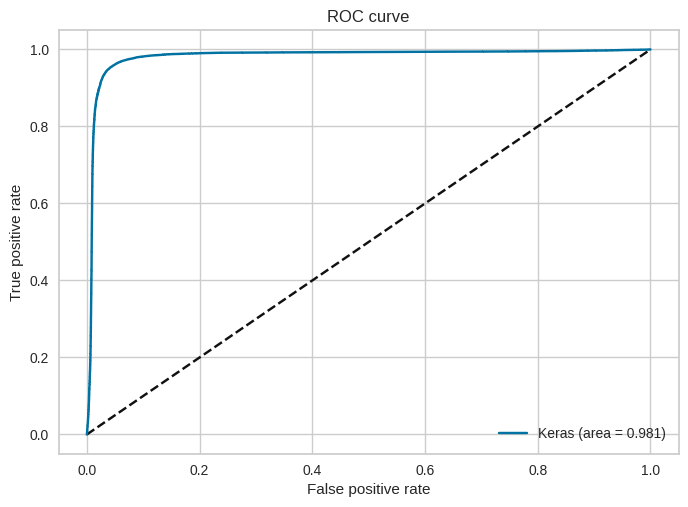

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.7423319377146351
score on train: 0.5717140705555234
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     30772
           1       0.98      0.89      0.93     19423
           2       0.63      0.63      0.63     14709
           3       0.35      0.70      0.47      7921
           4       0.41      0.05      0.09      5357
           5       0.83      0.32      0.47      4578
           6       0.44      0.02      0.03       909
           7       0.31      0.03      0.06       780
           8       0.43      0.29      0.35       513
           9       0.00      0.00      0.00        66

    accuracy                           0.74     85028
   macro avg       0.52      0.39      0.39     85028
weighted avg       0.76      0.74      0.72     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


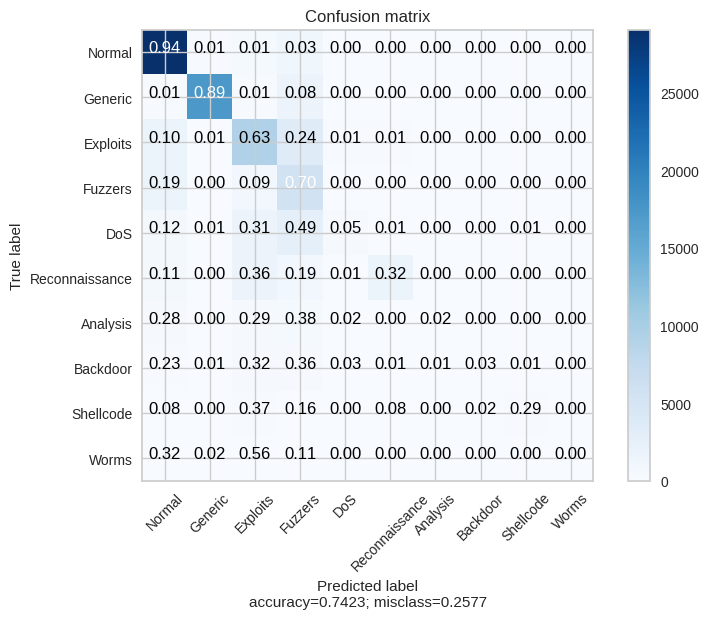

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod3)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['45%']=acc

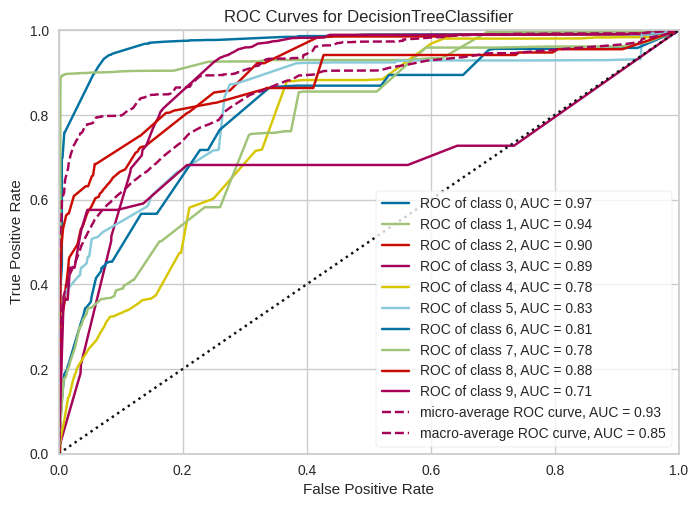

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod3, X_test, y_multi_test)

<ipython-input-56-61b4c3d963da>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod3)


score on test: 0.7010278966928541
score on train: 0.5659329201181719
              precision    recall  f1-score   support

           0       0.59      0.99      0.74     30772
           1       1.00      0.90      0.95     19423
           2       0.70      0.62      0.66     14709
           3       0.87      0.27      0.42      7921
           4       0.92      0.00      0.01      5357
           5       0.96      0.09      0.17      4578
           6       1.00      0.00      0.01       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.70     85028
   macro avg       0.60      0.29      0.29     85028
weighted avg       0.76      0.70      0.65     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


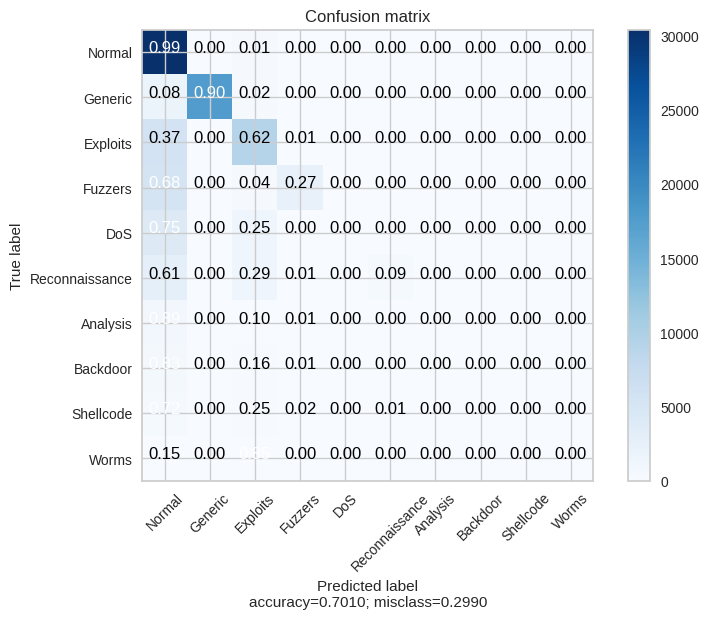

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod3)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['45%']=acc

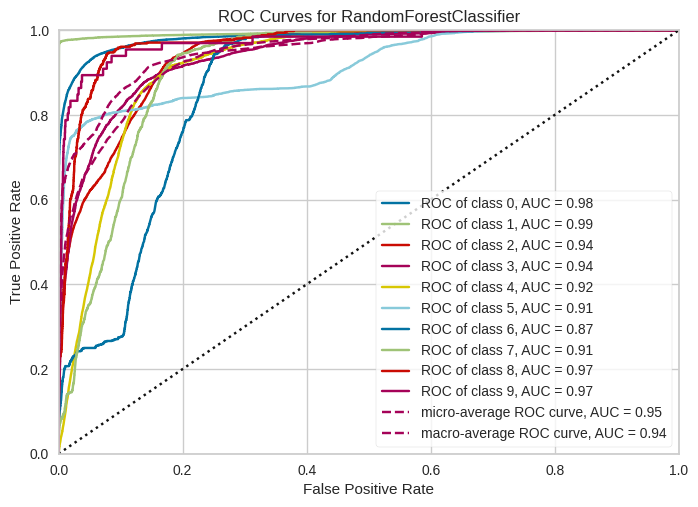

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod3, X_test, y_multi_test)

score on test: 0.5576986404478524
score on train: 0.5986966344204367
              precision    recall  f1-score   support

           0       0.51      0.98      0.68     30772
           1       0.29      0.00      0.01     19423
           2       0.70      0.65      0.67     14709
           3       0.57      0.69      0.63      7921
           4       0.42      0.03      0.05      5357
           5       0.81      0.38      0.52      4578
           6       0.82      0.03      0.06       909
           7       0.75      0.03      0.07       780
           8       0.72      0.19      0.31       513
           9       0.50      0.03      0.06        66

    accuracy                           0.56     85028
   macro avg       0.61      0.30      0.30     85028
weighted avg       0.52      0.56      0.46     85028



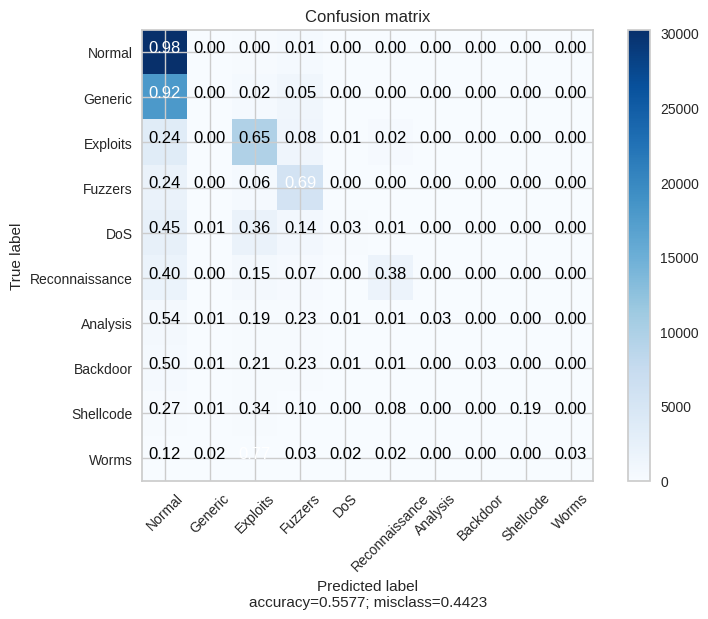

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod3)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['45%']=acc

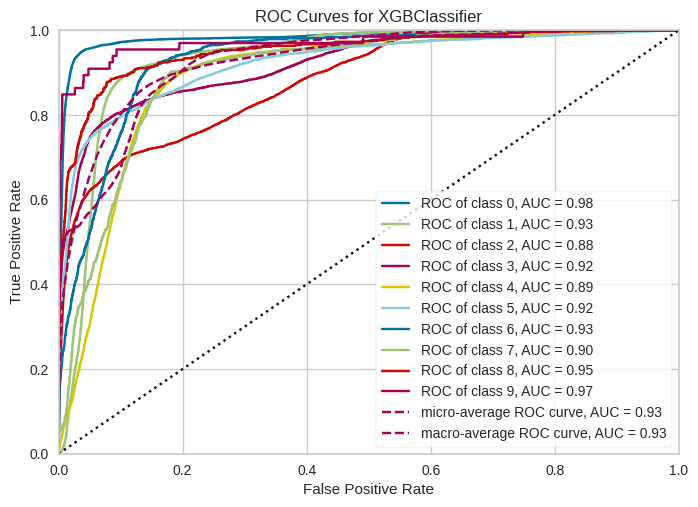

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod3, X_test, y_multi_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               5504      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.4337 - accuracy: 0.5186 - f1_m: 1.7916 - precision_m: 3973313.5000 - recall_m: 1.6215
Epoch 2/100
1349/

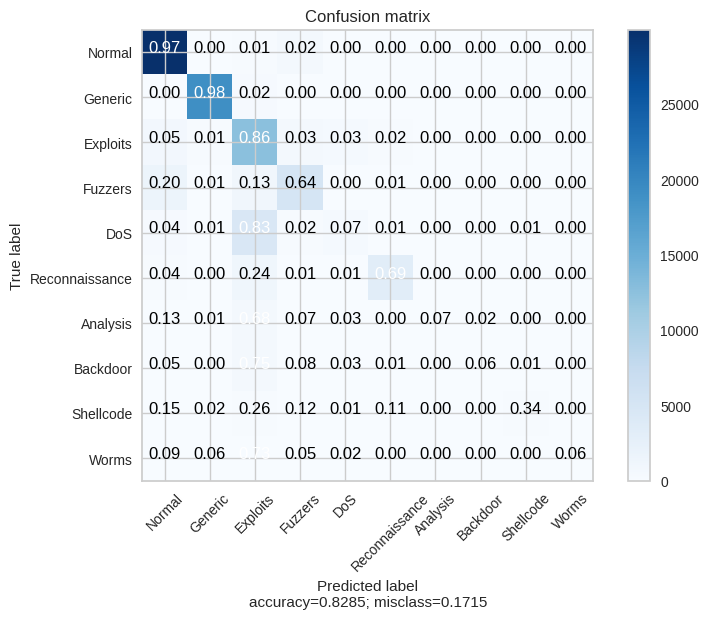

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod3,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['45%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod3)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.726385880300744


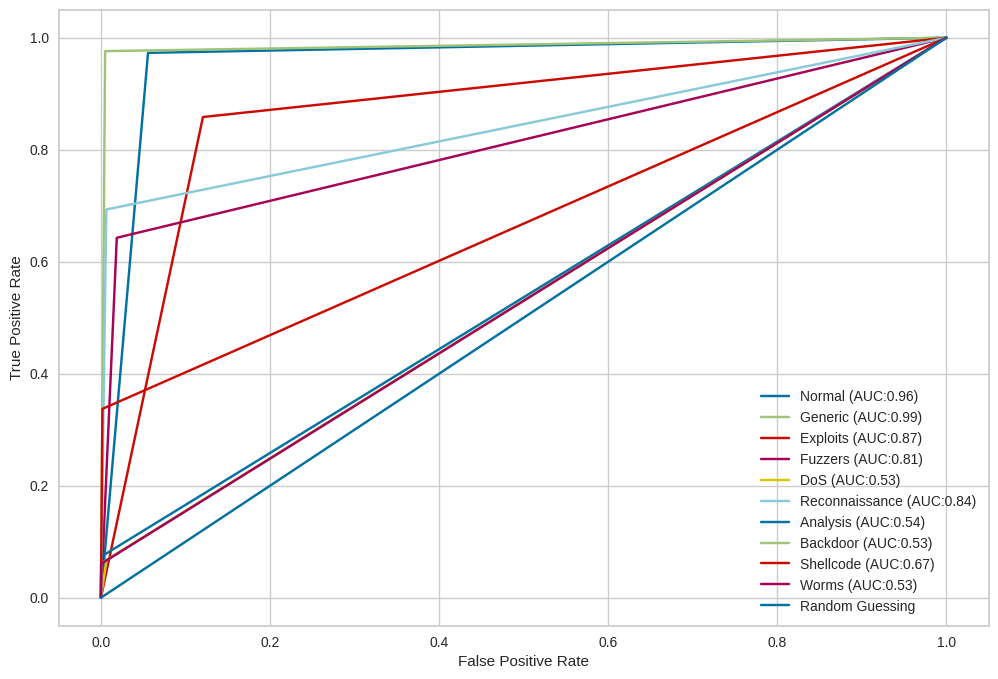

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

60% label flipped

In [ ]:
a, b = np.split(y_train, [int(.6*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod4 = pd.concat([a, b], axis=0)
y_train_mod4

label
8264        1
13884       0
24043       0
80033       1
61137       1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [ ]:
a, b = np.split(y_multi_train, [int(.6*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod4 = pd.concat([a, b], axis=0)
y_multi_train_mod4

attack_cat
8264             2
13884            0
24043            0
80033            2
61137            2
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8895069859340452
score on train: 0.6968545444013208
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     30772
           1       0.86      1.00      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.92      0.85      0.87     85028
weighted avg       0.90      0.89      0.88     85028



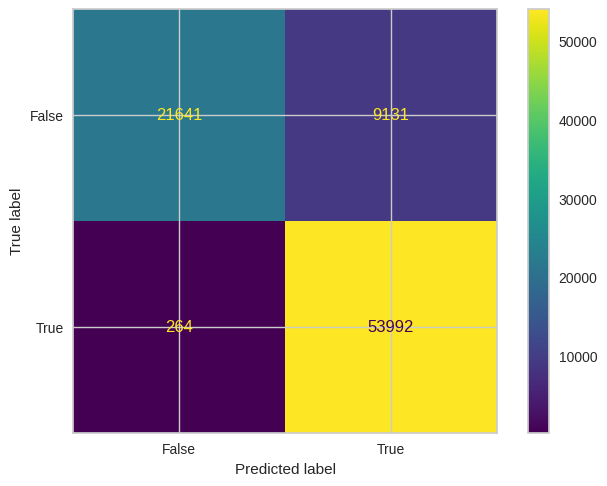

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod4)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod4)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['60%']=acc

AUC: 0.9604


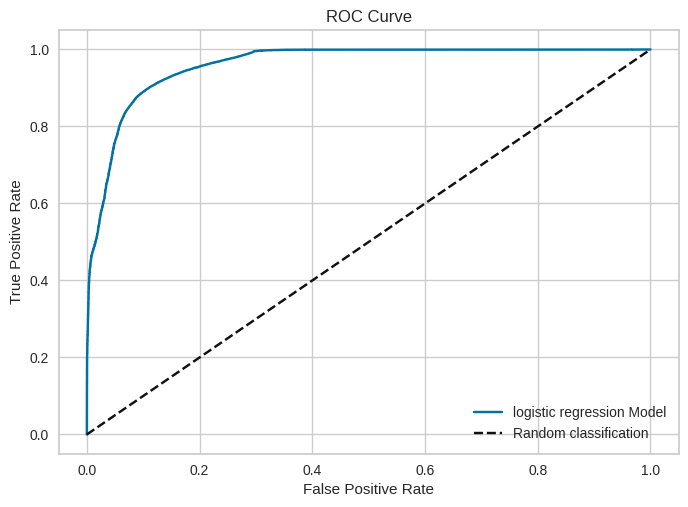

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-66-25f278696cdb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod4)


score on test: 0.8739826880556993
score on train: 0.7051381567514337
              precision    recall  f1-score   support

           0       1.00      0.65      0.79     30772
           1       0.84      1.00      0.91     54256

    accuracy                           0.87     85028
   macro avg       0.92      0.83      0.85     85028
weighted avg       0.89      0.87      0.87     85028



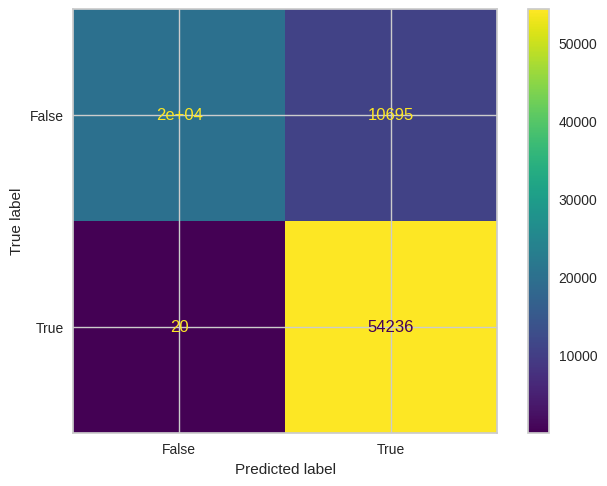

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod4)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod4)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['60%']=acc

AUC: 0.9616


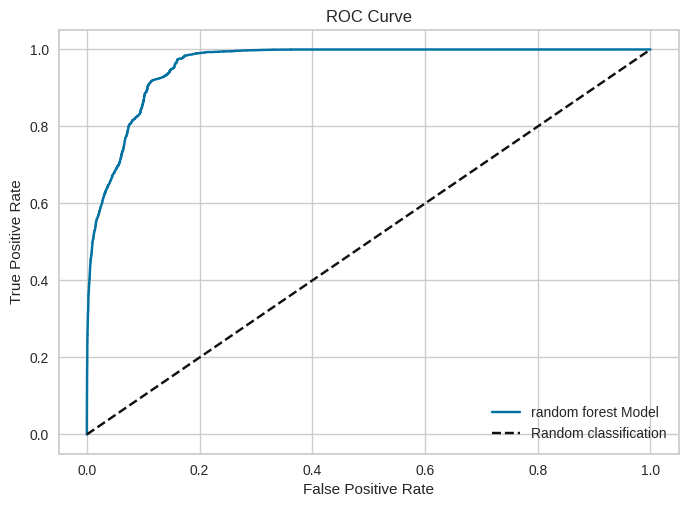

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9023027708519546
score on train: 0.7299484446504084
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     30772
           1       0.88      0.98      0.93     54256

    accuracy                           0.90     85028
   macro avg       0.92      0.87      0.89     85028
weighted avg       0.91      0.90      0.90     85028



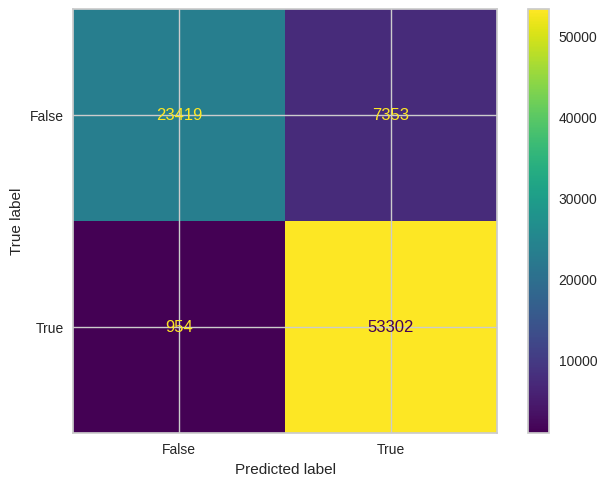

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod4)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod4)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['60%']=acc

AUC: 0.9805


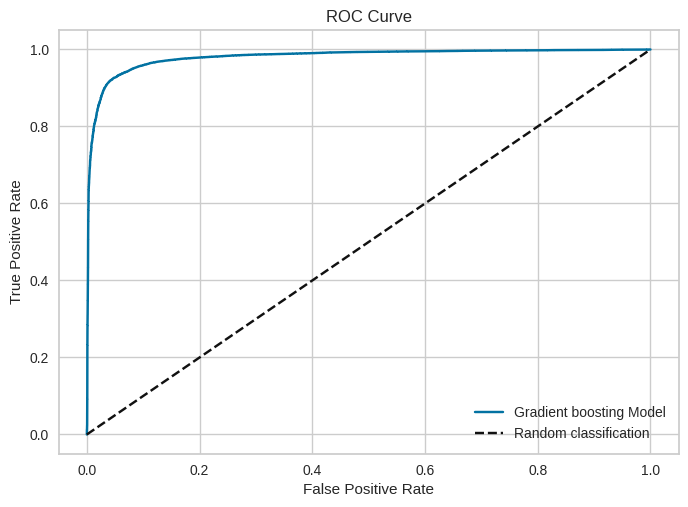

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.5998 - accuracy: 0.6957 - f1_m: 0.7790 - precision_m: 0.7256 - recall_m: 0.8434
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5943 - accuracy: 0.6987 - f1_m: 0.7792 - precision_m: 0.7316 - recall_m: 0.8360
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5926 - accuracy: 0.6995 - f1_m: 0.7782 - precision_m: 0.7351 - recall_m: 0.8290
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5914 - accuracy: 0.6999 - f1_m: 0.7768 - precision_m: 0.7389 - recall_m: 0.8215
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5909 - accuracy: 0.7006 - f1_m: 0.7768 - precision_m: 0.7405 - recall_m: 0.8193
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.5901 - accuracy: 0.7010 - f1_m: 0.7762 - precision_m: 0.7424 - recall_m: 0.8157
Epoch 7/100
1349/1349 [=======================

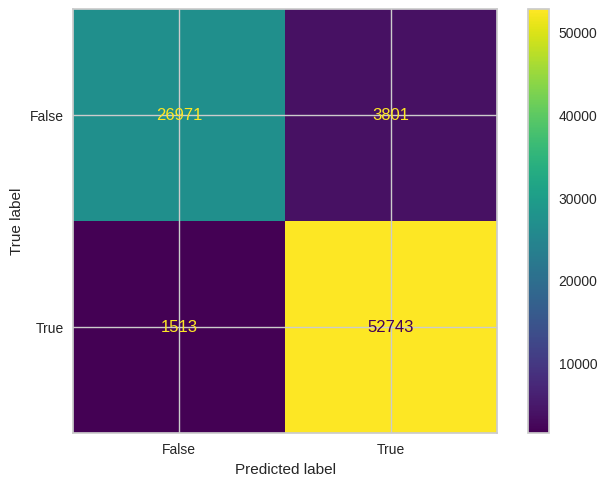

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod4, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod4)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['60%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

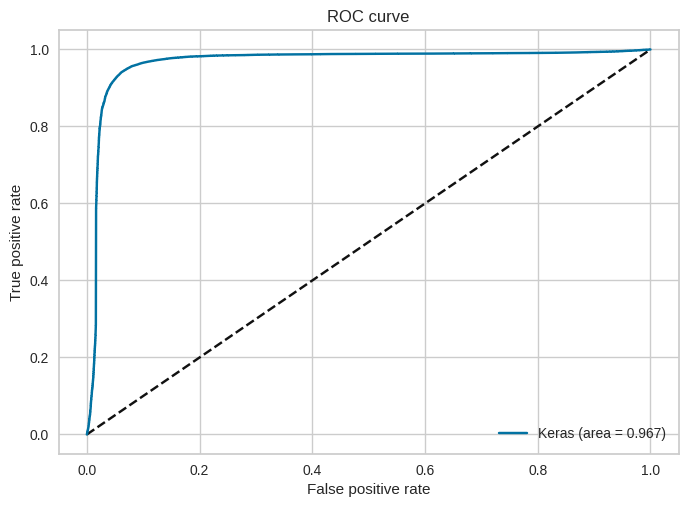

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.6760008467798843
score on train: 0.48776574175983317
              precision    recall  f1-score   support

           0       0.72      0.97      0.83     30772
           1       0.97      0.66      0.78     19423
           2       0.51      0.57      0.54     14709
           3       0.39      0.55      0.45      7921
           4       0.38      0.02      0.04      5357
           5       0.78      0.37      0.50      4578
           6       0.50      0.08      0.14       909
           7       0.49      0.03      0.06       780
           8       0.46      0.17      0.25       513
           9       0.00      0.00      0.00        66

    accuracy                           0.68     85028
   macro avg       0.52      0.34      0.36     85028
weighted avg       0.69      0.68      0.65     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


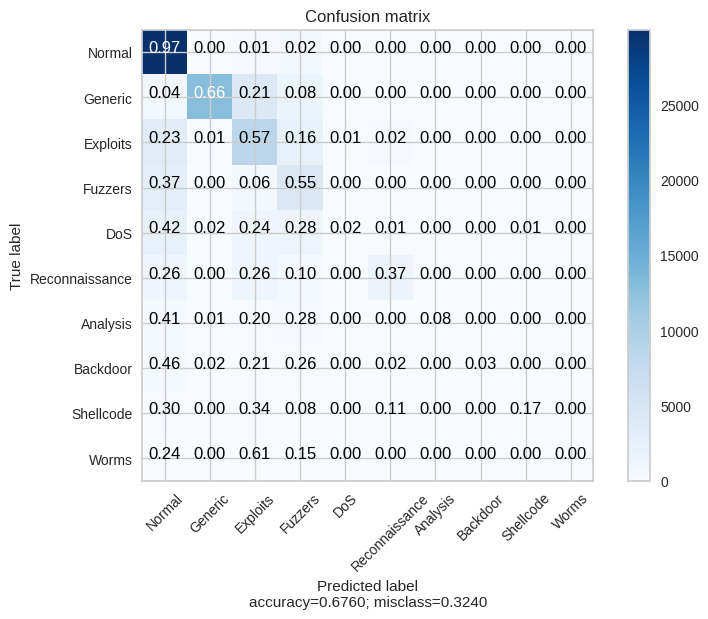

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod4)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod4)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['60%']=acc

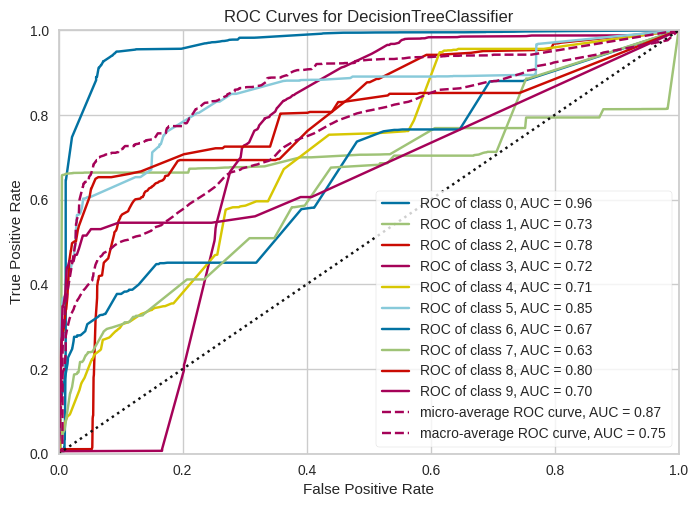

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod4, X_test, y_multi_test)

<ipython-input-74-17d860f9577b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod4)


score on test: 0.580185350708002
score on train: 0.4808665932920118
              precision    recall  f1-score   support

           0       0.48      1.00      0.65     30772
           1       1.00      0.48      0.65     19423
           2       0.78      0.57      0.66     14709
           3       0.95      0.13      0.23      7921
           4       0.96      0.00      0.01      5357
           5       0.00      0.00      0.00      4578
           6       1.00      0.00      0.00       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.58     85028
   macro avg       0.52      0.22      0.22     85028
weighted avg       0.70      0.58      0.52     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


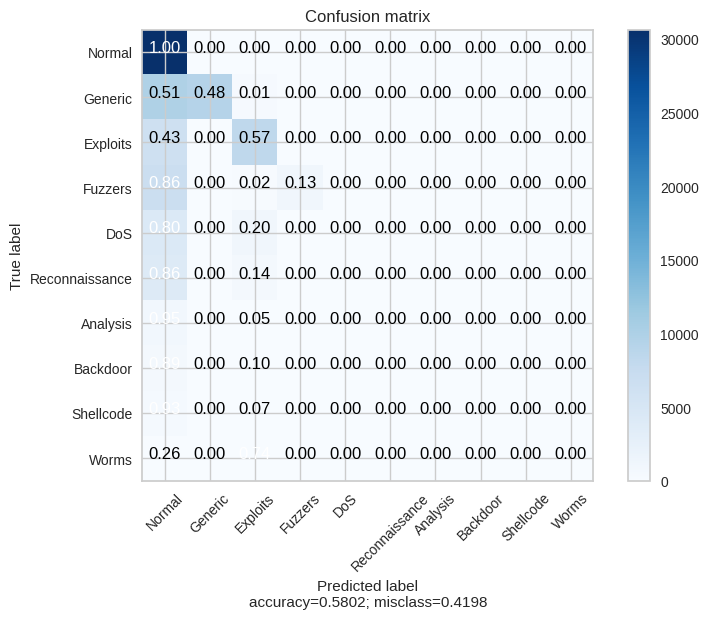

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod4)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod4)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['60%']=acc

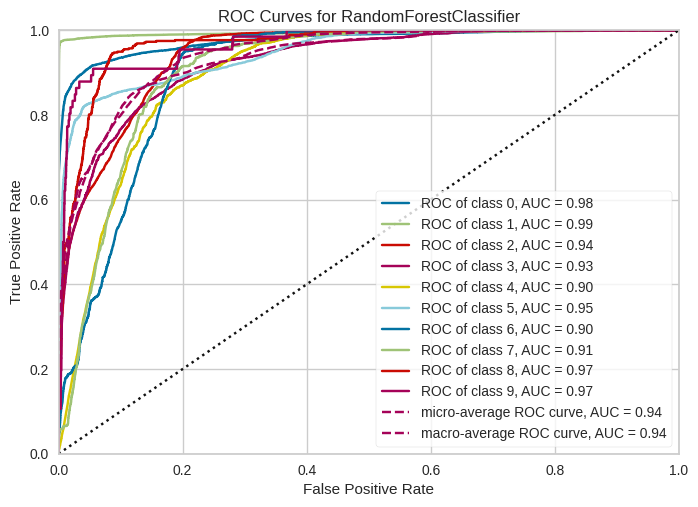

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod4, X_test, y_multi_test)

score on test: 0.5486898433457215
score on train: 0.5126049933383537


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.51      0.99      0.67     30772
           1       0.37      0.02      0.03     19423
           2       0.68      0.65      0.66     14709
           3       0.60      0.53      0.56      7921
           4       0.37      0.12      0.18      5357
           5       0.83      0.34      0.48      4578
           6       0.93      0.02      0.03       909
           7       0.87      0.03      0.05       780
           8       0.66      0.19      0.29       513
           9       0.00      0.00      0.00        66

    accuracy                           0.55     85028
   macro avg       0.58      0.29      0.30     85028
weighted avg       0.53      0.55      0.46     85028



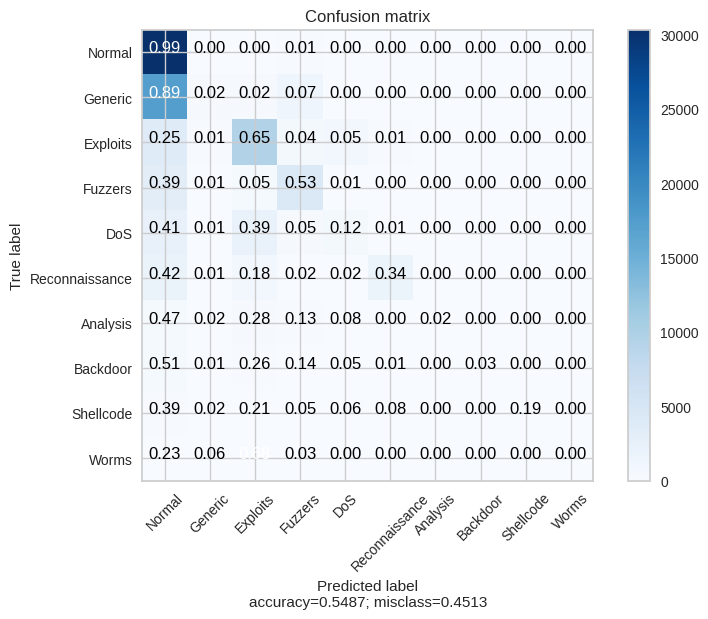

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod4)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod4)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['60%']=acc

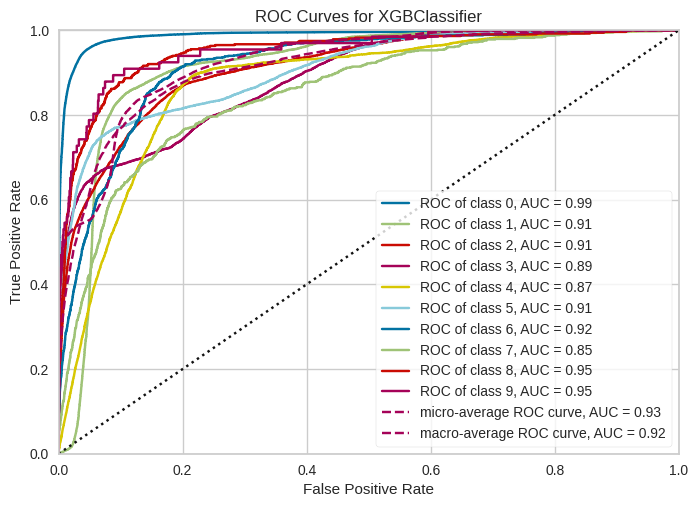

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod4, X_test, y_multi_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               5504      
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.5623 - accuracy: 0.4476 - f1_m: 1.9282 - precision_m: 2542624.2500 - recall_m: 1.5758
Epoch 2/100
1349/

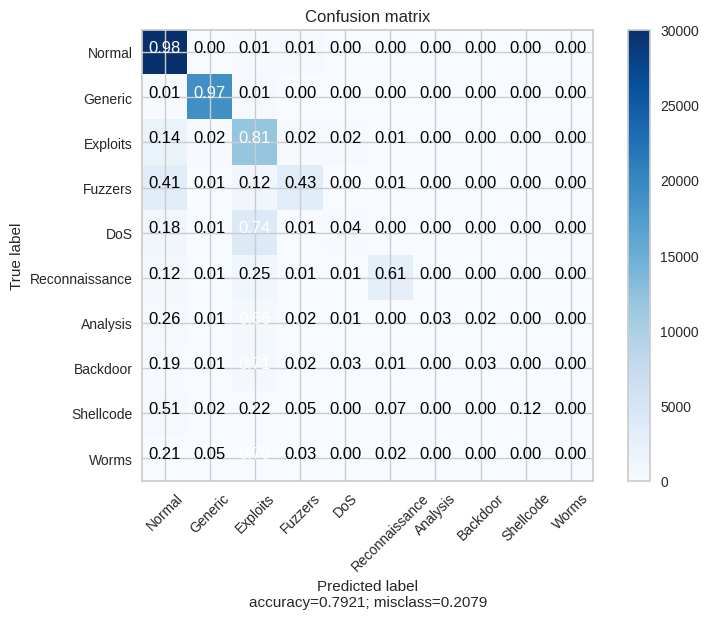

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod4,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['60%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod4)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.6872606257209072


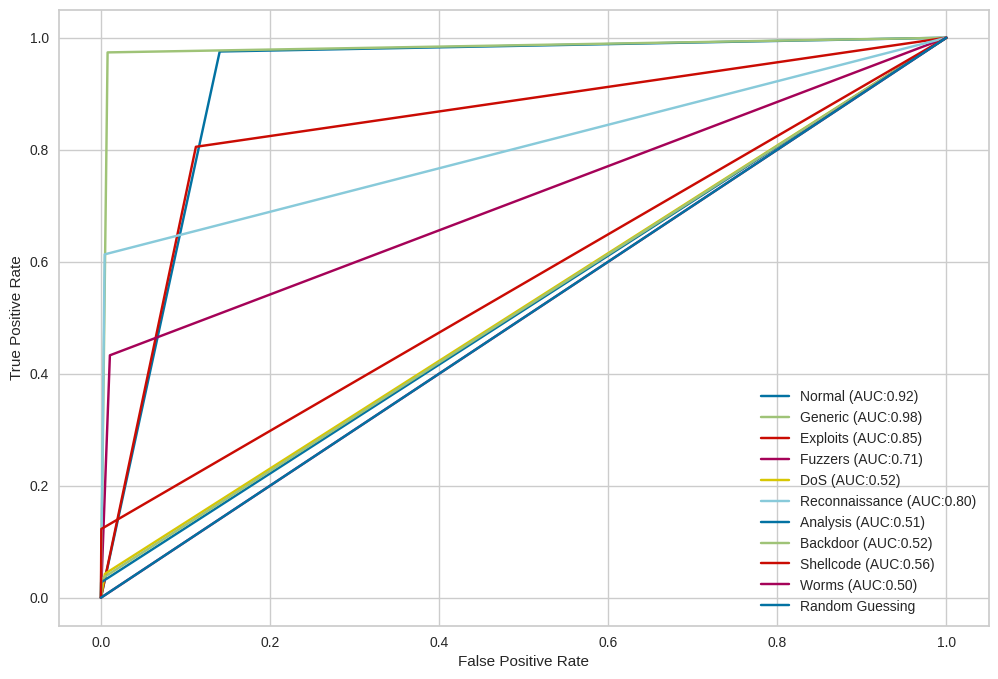

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

75% label flipped

In [ ]:
a, b = np.split(y_train, [int(.75*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod5 = pd.concat([a, b], axis=0)
y_train_mod5

label
26911       1
3995        1
98033       0
72671       1
101587      1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [ ]:
a, b = np.split(y_multi_train, [int(.75*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod5 = pd.concat([a, b], axis=0)
y_multi_train_mod5

attack_cat
26911            4
3995             2
98033            0
72671            3
101587           1
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8180716940302019
score on train: 0.6467763424665469
              precision    recall  f1-score   support

           0       1.00      0.50      0.66     30772
           1       0.78      1.00      0.88     54256

    accuracy                           0.82     85028
   macro avg       0.89      0.75      0.77     85028
weighted avg       0.86      0.82      0.80     85028



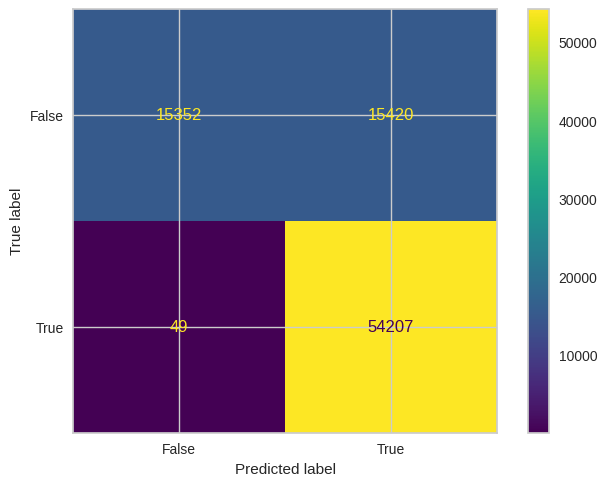

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod5)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod5)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['75%']=acc

AUC: 0.9595


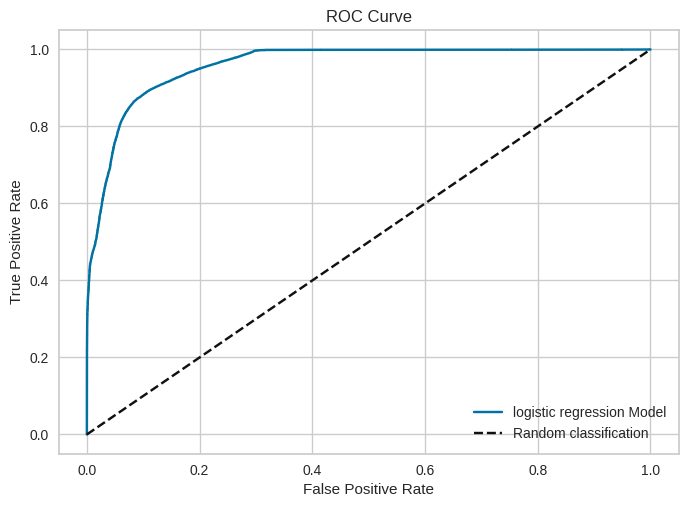

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-84-e52af65ba18a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod5)


score on test: 0.8358423107682176
score on train: 0.6663442043677229
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     30772
           1       0.80      1.00      0.89     54256

    accuracy                           0.84     85028
   macro avg       0.90      0.77      0.80     85028
weighted avg       0.87      0.84      0.82     85028



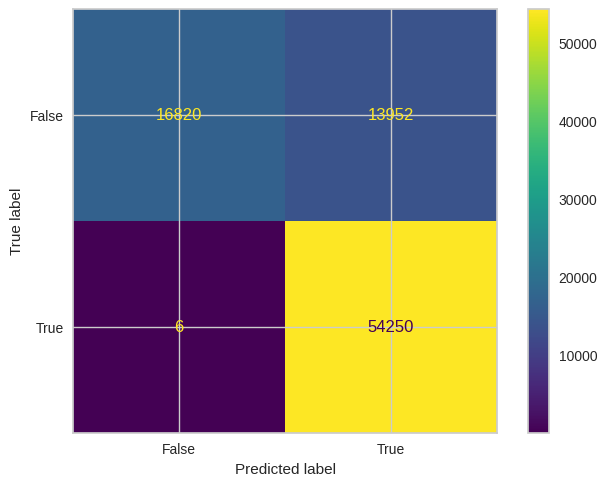

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod5)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod5)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['75%']=acc

AUC: 0.9611


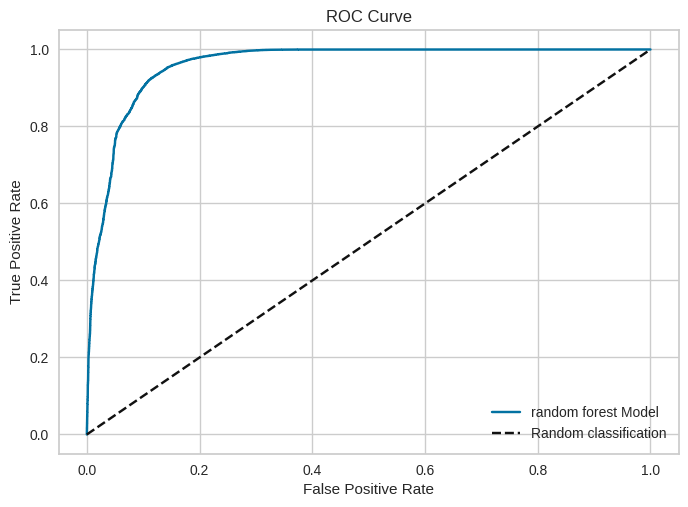

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.8997624311991343
score on train: 0.6873892139257372
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     30772
           1       0.87      0.99      0.93     54256

    accuracy                           0.90     85028
   macro avg       0.92      0.87      0.88     85028
weighted avg       0.91      0.90      0.90     85028



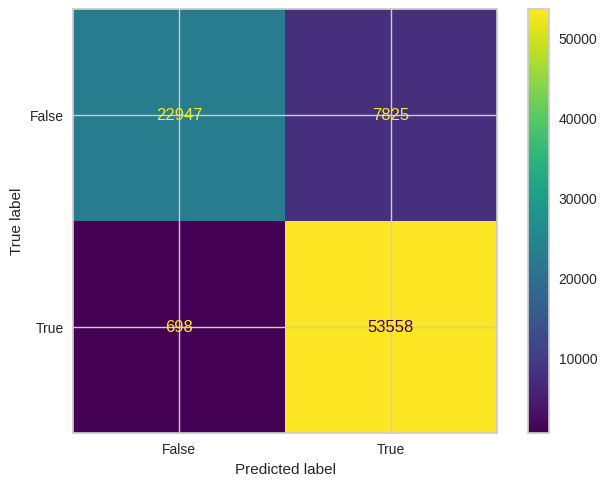

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod5)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod5)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['75%']=acc

AUC: 0.9783


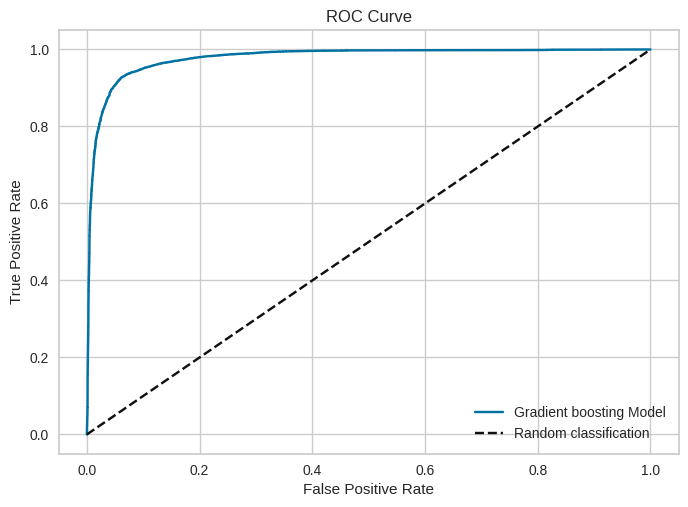

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.6351 - accuracy: 0.6451 - f1_m: 0.7581 - precision_m: 0.6712 - recall_m: 0.8755
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.6326 - accuracy: 0.6459 - f1_m: 0.7545 - precision_m: 0.6771 - recall_m: 0.8569
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6319 - accuracy: 0.6466 - f1_m: 0.7561 - precision_m: 0.6762 - recall_m: 0.8622
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6313 - accuracy: 0.6469 - f1_m: 0.7503 - precision_m: 0.6837 - recall_m: 0.8347
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.6308 - accuracy: 0.6479 - f1_m: 0.7525 - precision_m: 0.6828 - recall_m: 0.8421
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.6302 - accuracy: 0.6479 - f1_m: 0.7514 - precision_m: 0.6839 - recall_m: 0.8373
Epoch 7/100
1349/1349 [=======================

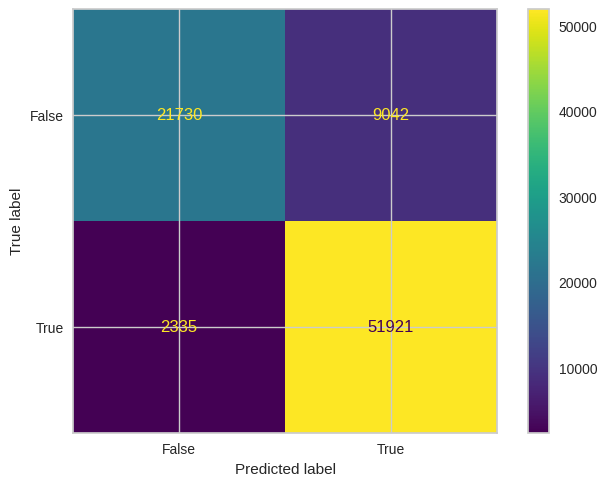

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod5, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod5)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['75%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

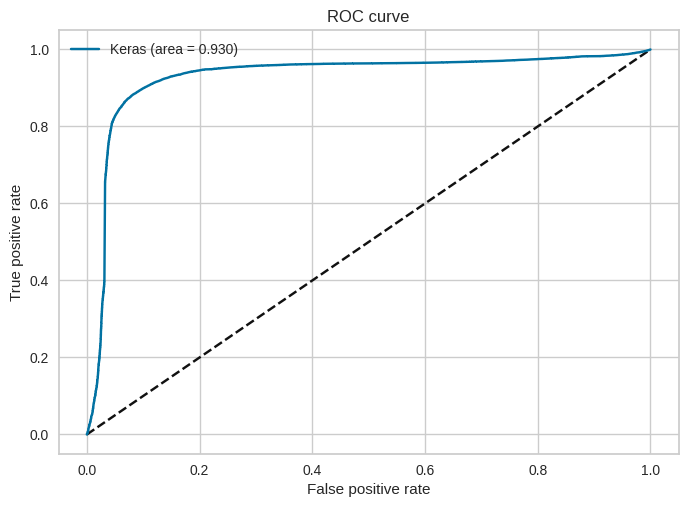

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.5653902243966693
score on train: 0.4094885014192203
              precision    recall  f1-score   support

           0       0.48      0.73      0.58     30772
           1       0.95      0.88      0.92     19423
           2       0.43      0.40      0.41     14709
           3       0.27      0.13      0.18      7921
           4       0.30      0.00      0.00      5357
           5       0.62      0.28      0.38      4578
           6       0.00      0.00      0.00       909
           7       0.12      0.02      0.03       780
           8       0.78      0.09      0.16       513
           9       0.00      0.00      0.00        66

    accuracy                           0.57     85028
   macro avg       0.39      0.25      0.27     85028
weighted avg       0.55      0.57      0.53     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


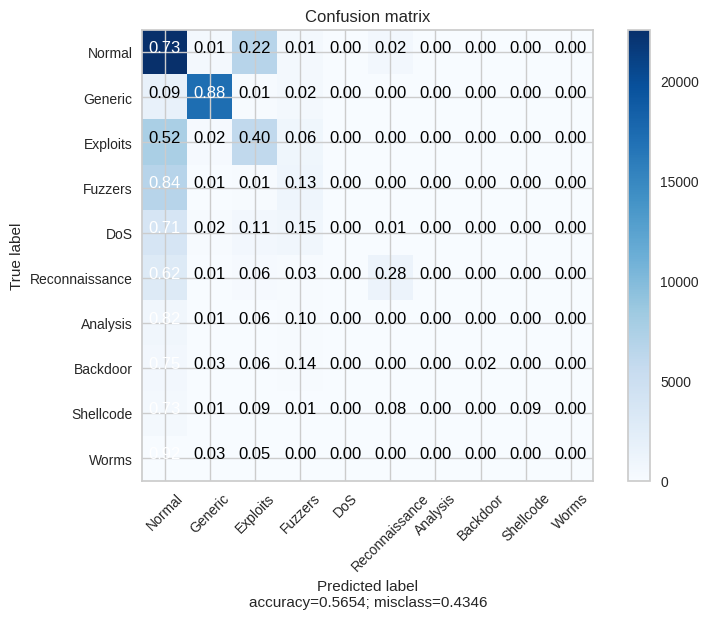

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod5)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod5)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['75%']=acc

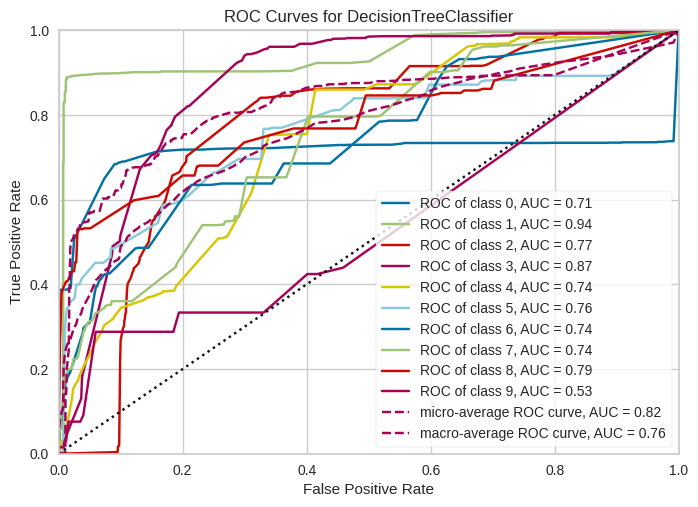

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod5, X_test, y_multi_test)

<ipython-input-92-bdeaaa741129>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod5)


score on test: 0.4220727289833937
score on train: 0.4105369866187801
              precision    recall  f1-score   support

           0       0.39      1.00      0.56     30772
           1       0.83      0.01      0.02     19423
           2       0.86      0.33      0.48     14709
           3       1.00      0.00      0.01      7921
           4       1.00      0.00      0.00      5357
           5       0.00      0.00      0.00      4578
           6       0.00      0.00      0.00       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.42     85028
   macro avg       0.41      0.13      0.11     85028
weighted avg       0.63      0.42      0.29     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


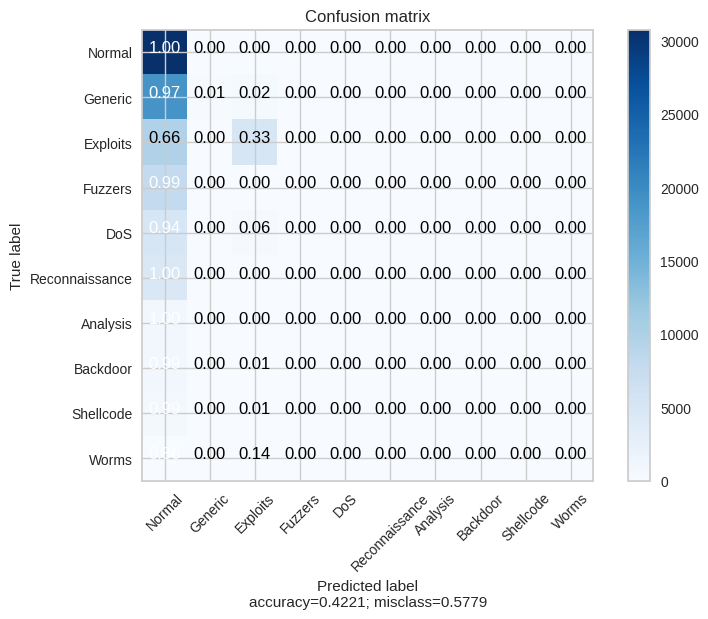

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod5)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod5)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['75%']=acc

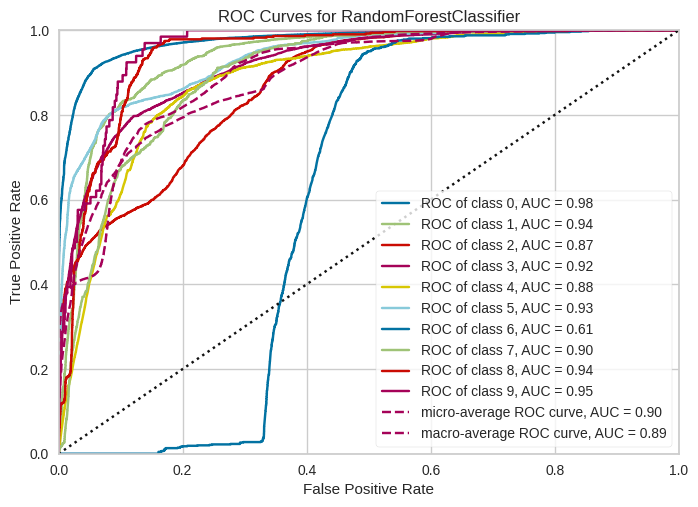

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod5, X_test, y_multi_test)

score on test: 0.49116761537375925
score on train: 0.4389909054046226


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      0.98      0.64     30772
           1       0.31      0.21      0.25     19423
           2       0.82      0.32      0.47     14709
           3       0.87      0.18      0.29      7921
           4       0.46      0.01      0.01      5357
           5       0.89      0.26      0.41      4578
           6       1.00      0.00      0.00       909
           7       0.62      0.01      0.01       780
           8       0.74      0.06      0.11       513
           9       0.00      0.00      0.00        66

    accuracy                           0.49     85028
   macro avg       0.62      0.20      0.22     85028
weighted avg       0.57      0.49      0.42     85028



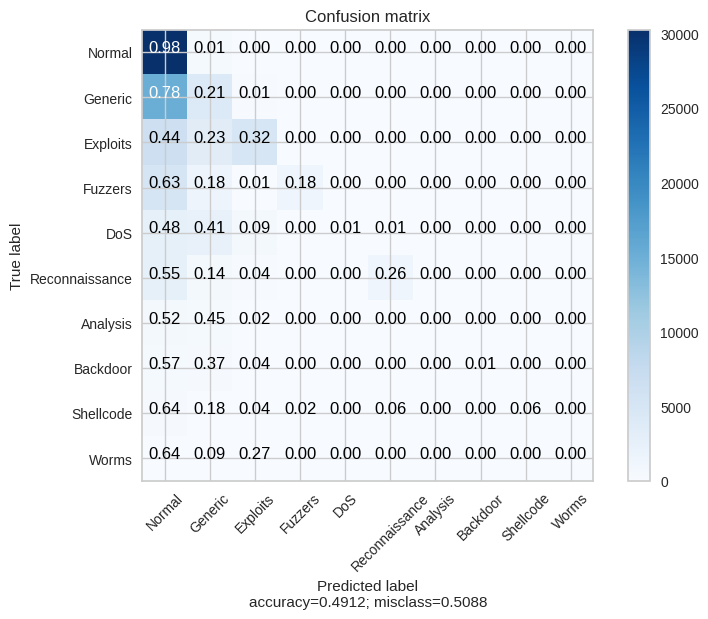

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod5)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod5)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['75%']=acc

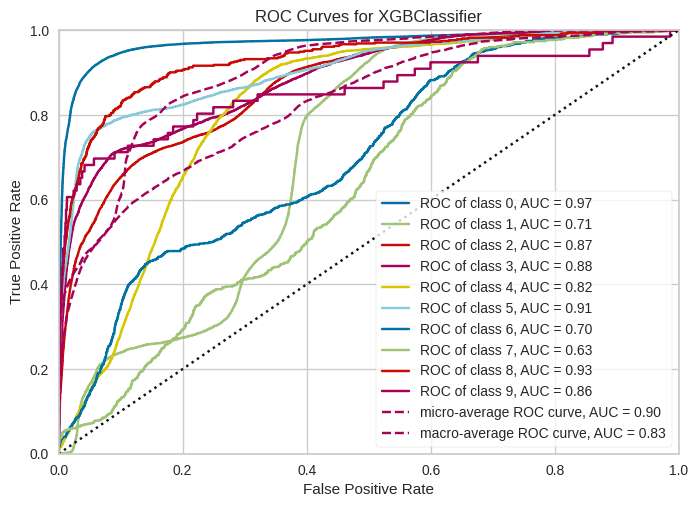

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod5, X_test, y_multi_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               5504      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.6520 - accuracy: 0.3933 - f1_m: 2.4312 - precision_m: 13180134.0000 - recall_m: 1.4981
Epoch 2/100
1349

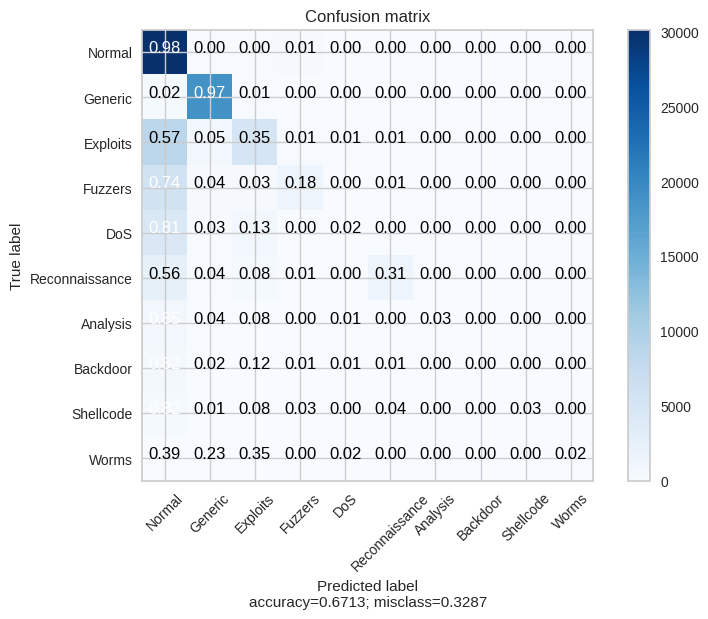

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod5,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['75%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod5)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.6190844851155115


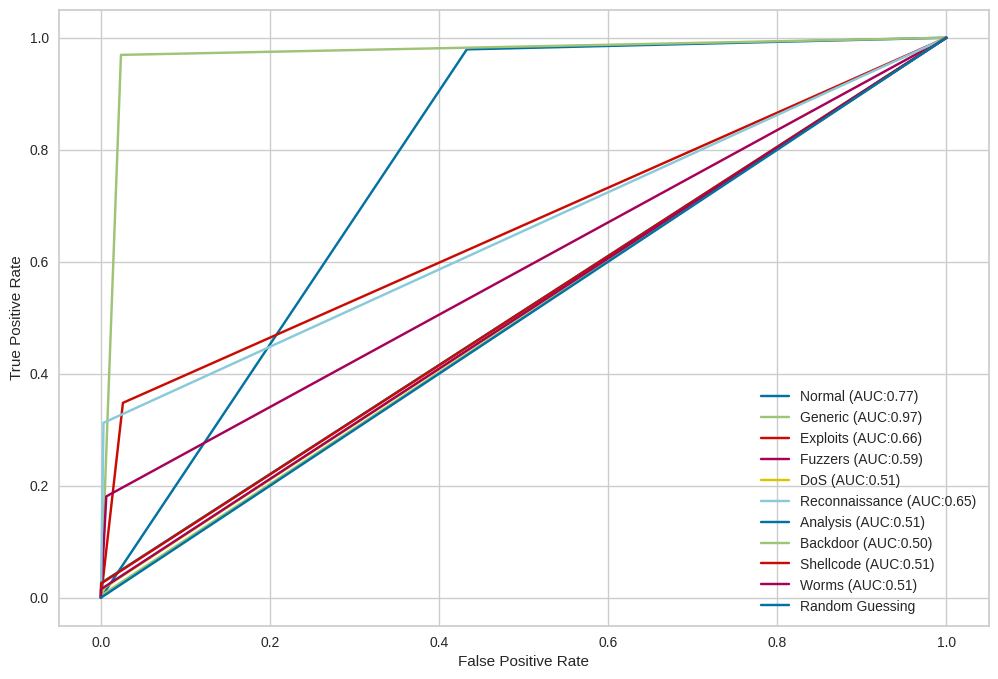

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

90% label flipped

In [ ]:
a, b = np.split(y_train, [int(.9*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod6 = pd.concat([a, b], axis=0)
y_train_mod6

label
68541       1
56392       1
95565       1
13619       0
48821       1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [ ]:
a, b = np.split(y_multi_train, [int(.9*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod6 = pd.concat([a, b], axis=0)
y_multi_train_mod6

attack_cat
68541            5
56392            1
95565            2
13619            0
48821            5
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.6386602060497718
score on train: 0.6395991426750854
              precision    recall  f1-score   support

           0       0.91      0.00      0.00     30772
           1       0.64      1.00      0.78     54256

    accuracy                           0.64     85028
   macro avg       0.78      0.50      0.39     85028
weighted avg       0.74      0.64      0.50     85028



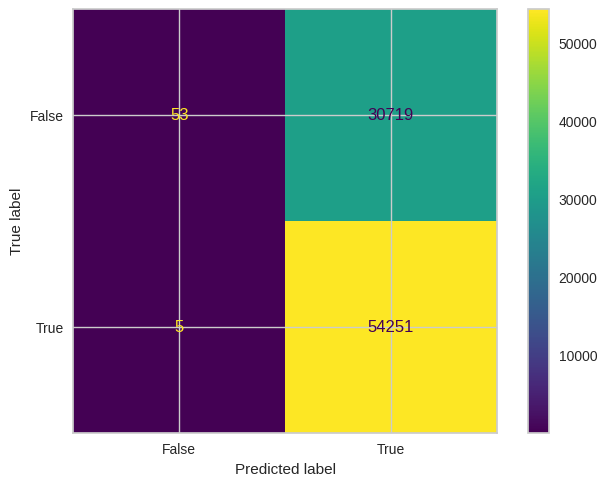

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod6)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod6)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_log['90%']=acc

AUC: 0.9558


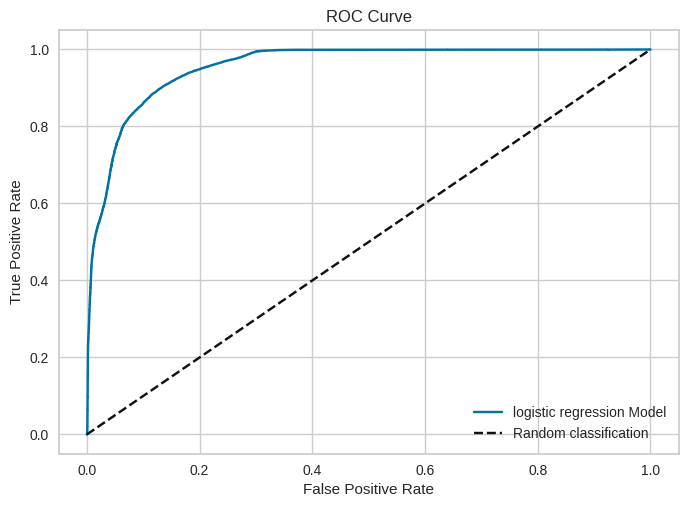

In [ ]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-102-68839a1d7b7e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod6)


score on test: 0.6412005457025921
score on train: 0.6424549614783062
              precision    recall  f1-score   support

           0       0.96      0.01      0.02     30772
           1       0.64      1.00      0.78     54256

    accuracy                           0.64     85028
   macro avg       0.80      0.50      0.40     85028
weighted avg       0.75      0.64      0.50     85028



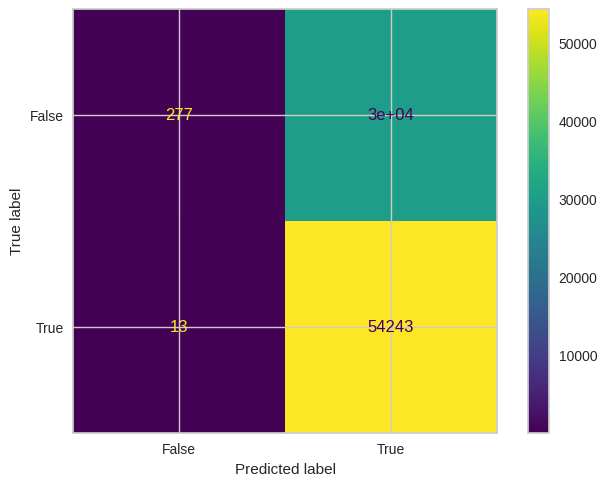

In [ ]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train_mod6)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod6)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_rf_b['90%']=acc

AUC: 0.9188


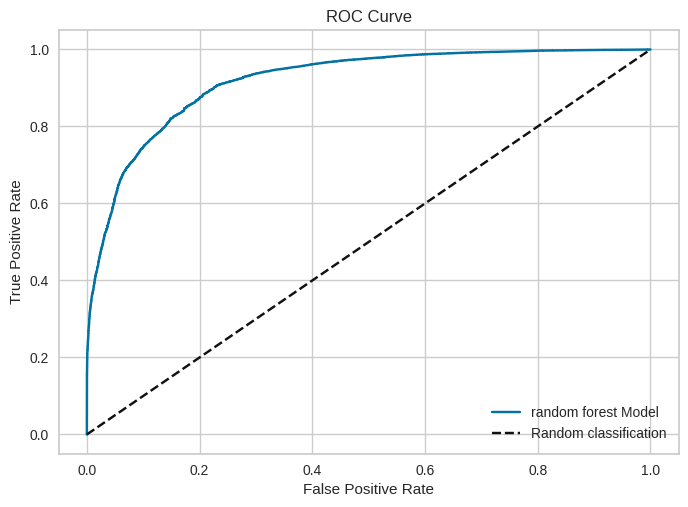

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.6709554499694218
score on train: 0.6603081735503679
              precision    recall  f1-score   support

           0       0.89      0.10      0.19     30772
           1       0.66      0.99      0.79     54256

    accuracy                           0.67     85028
   macro avg       0.78      0.55      0.49     85028
weighted avg       0.74      0.67      0.57     85028



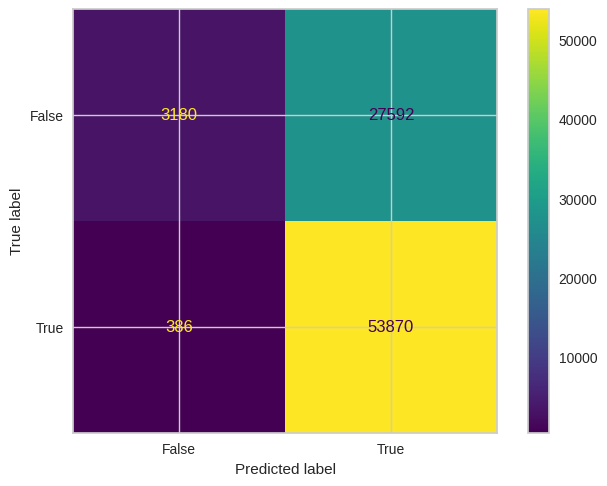

In [ ]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod6)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod6)))
print(metrics.classification_report(y_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
res_xgb_b['90%']=acc

AUC: 0.7489


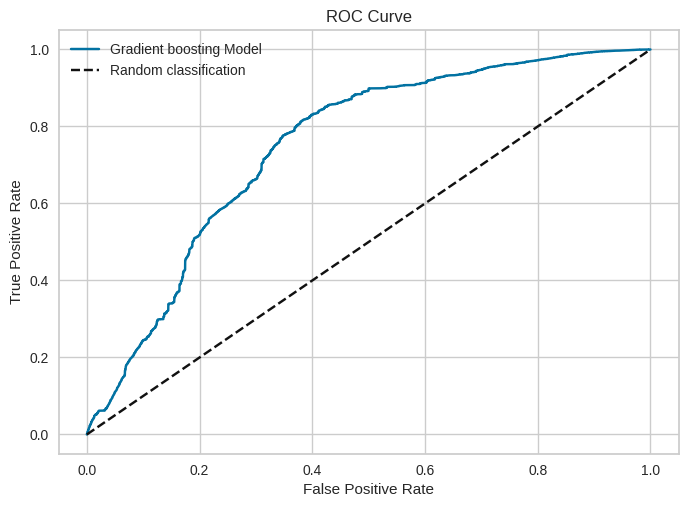

In [ ]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.6527 - accuracy: 0.6390 - f1_m: 0.7786 - precision_m: 0.6397 - recall_m: 0.9976
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6511 - accuracy: 0.6396 - f1_m: 0.7793 - precision_m: 0.6396 - recall_m: 0.9999
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.6507 - accuracy: 0.6396 - f1_m: 0.7793 - precision_m: 0.6396 - recall_m: 0.9999
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6506 - accuracy: 0.6396 - f1_m: 0.7793 - precision_m: 0.6396 - recall_m: 0.9998
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.6504 - accuracy: 0.6395 - f1_m: 0.7793 - precision_m: 0.6396 - recall_m: 0.9995
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.6503 - accuracy: 0.6396 - f1_m: 0.7792 - precision_m: 0.6398 - recall_m: 0.9992
Epoch 7/100
1349/1349 [=======================

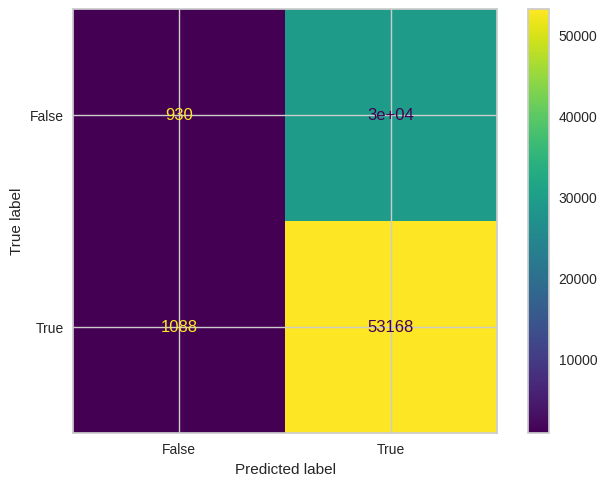

In [ ]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod6, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod6)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
scores=model.evaluate(X_test, y_test, verbose=0)
res_nn_b['90%']=scores[1]
from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

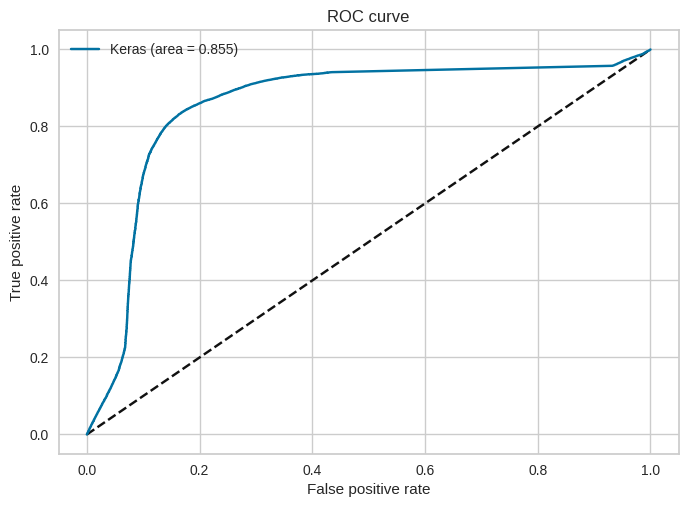

In [ ]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.2903161311567954
score on train: 0.36875398250593755
              precision    recall  f1-score   support

           0       0.35      0.68      0.46     30772
           1       0.49      0.09      0.15     19423
           2       0.15      0.12      0.14     14709
           3       0.09      0.02      0.03      7921
           4       0.00      0.00      0.00      5357
           5       0.00      0.00      0.00      4578
           6       0.00      0.00      0.00       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.29     85028
   macro avg       0.11      0.09      0.08     85028
weighted avg       0.27      0.29      0.23     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


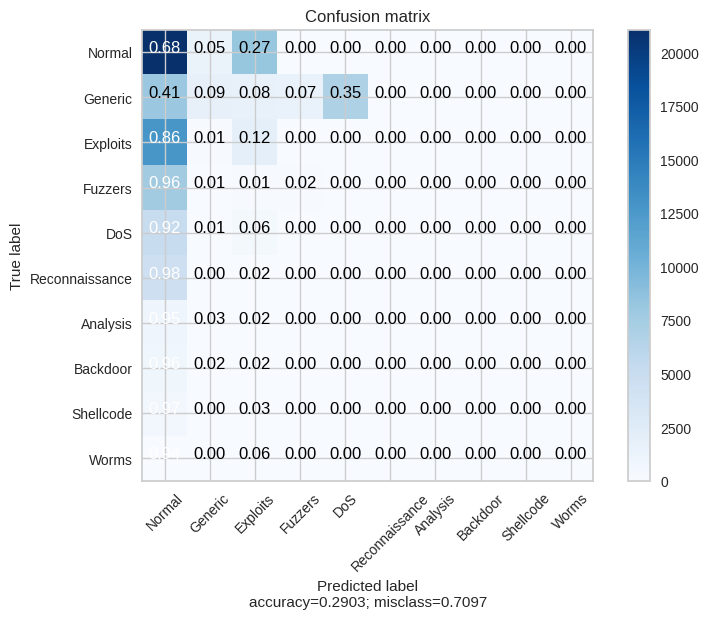

In [ ]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod6)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod6)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_tree['90%']=acc

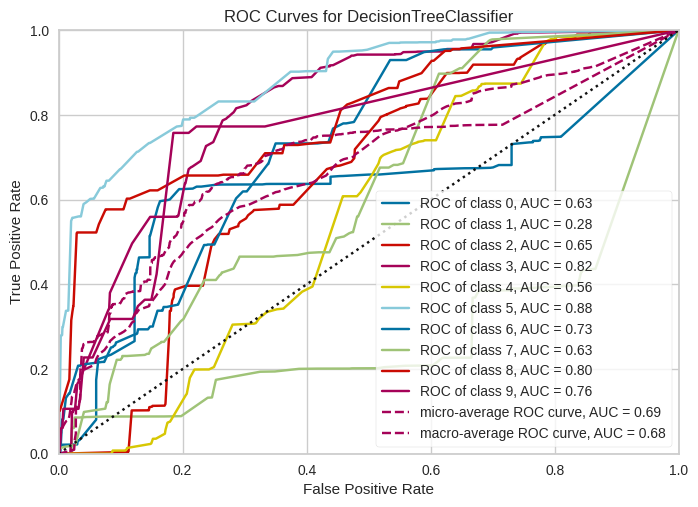

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod6, X_test, y_multi_test)

<ipython-input-110-221a02f4d844>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod6)


score on test: 0.37077198099449593
score on train: 0.3674158605109193
              precision    recall  f1-score   support

           0       0.37      1.00      0.53     30772
           1       0.83      0.03      0.07     19423
           2       0.77      0.01      0.02     14709
           3       0.00      0.00      0.00      7921
           4       0.00      0.00      0.00      5357
           5       0.00      0.00      0.00      4578
           6       0.00      0.00      0.00       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.37     85028
   macro avg       0.20      0.10      0.06     85028
weighted avg       0.45      0.37      0.21     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


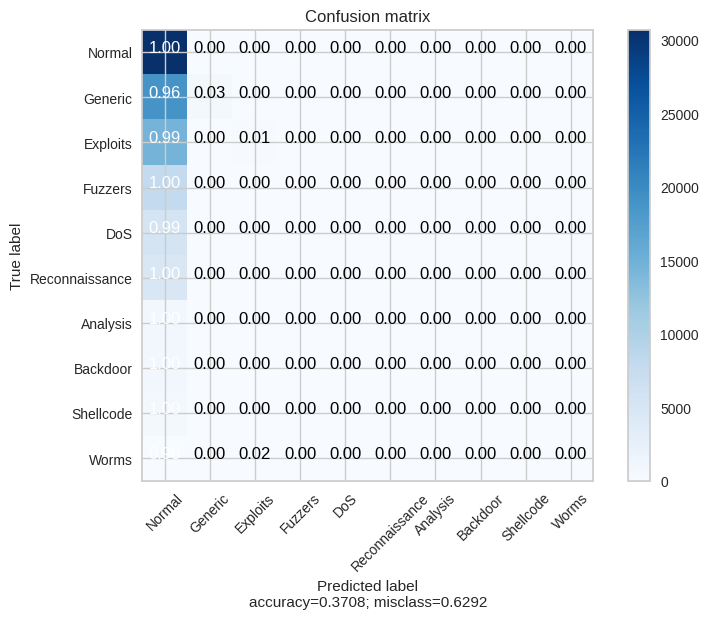

In [ ]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod6)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod6)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_rf_m['90%']=acc

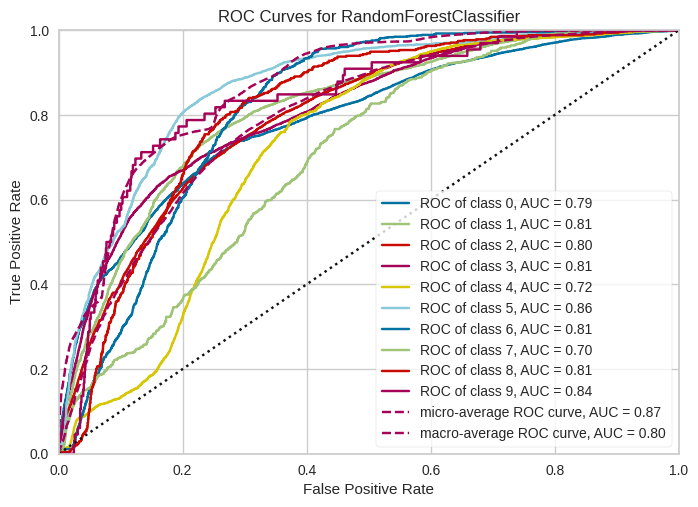

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [ ]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod6, X_test, y_multi_test)

score on test: 0.3873900362233617
score on train: 0.3936859178590048


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.42      0.66      0.52     30772
           1       0.33      0.59      0.43     19423
           2       0.41      0.08      0.13     14709
           3       0.50      0.02      0.04      7921
           4       0.09      0.00      0.00      5357
           5       0.12      0.00      0.00      4578
           6       0.00      0.00      0.00       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.39     85028
   macro avg       0.19      0.13      0.11     85028
weighted avg       0.36      0.39      0.31     85028



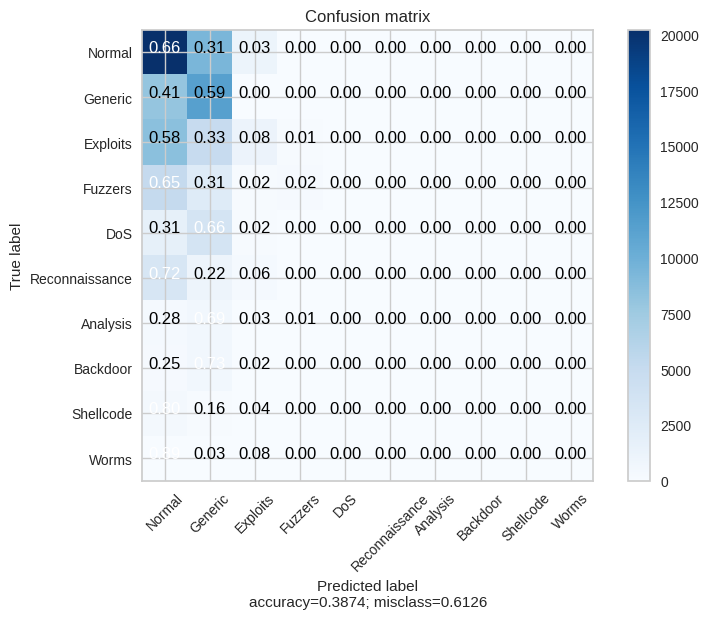

In [ ]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod6)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod6)))
print(metrics.classification_report(y_multi_test, y_pred))
acc=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
res_xgb_m['90%']=acc

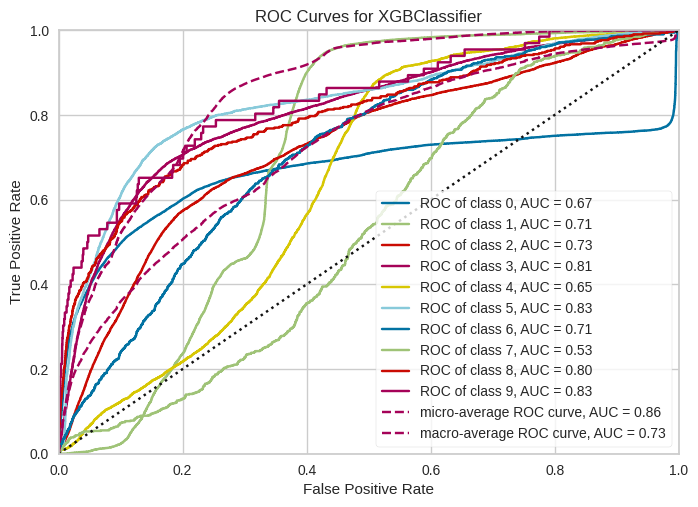

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [ ]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod6, X_test, y_multi_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               5504      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 1.6948 - accuracy: 0.3582 - f1_m: 2.9014 - precision_m: 770985408.0000 - recall_m: 1.4647
Epoch 2/100
13

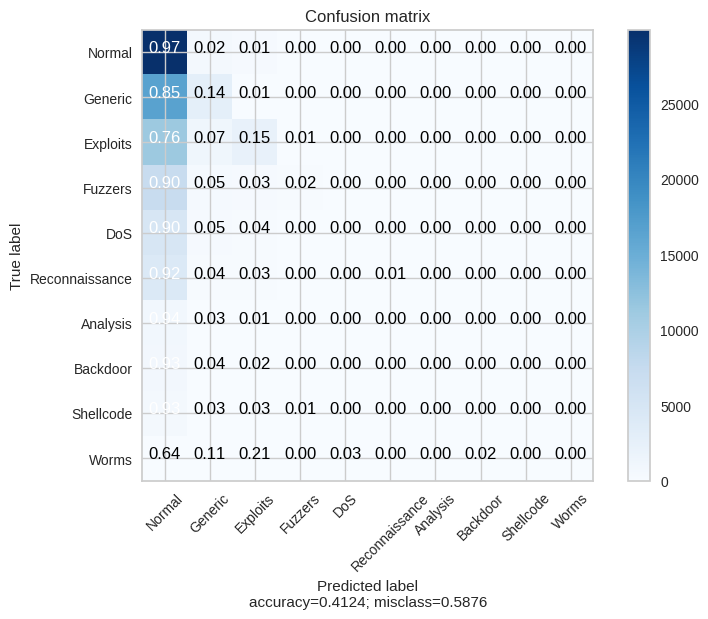

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod6,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
scores=model2.evaluate(X_test, y_multi_test, verbose=0)
res_nn_m['90%']=scores[1]
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod6)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.5194420591043587


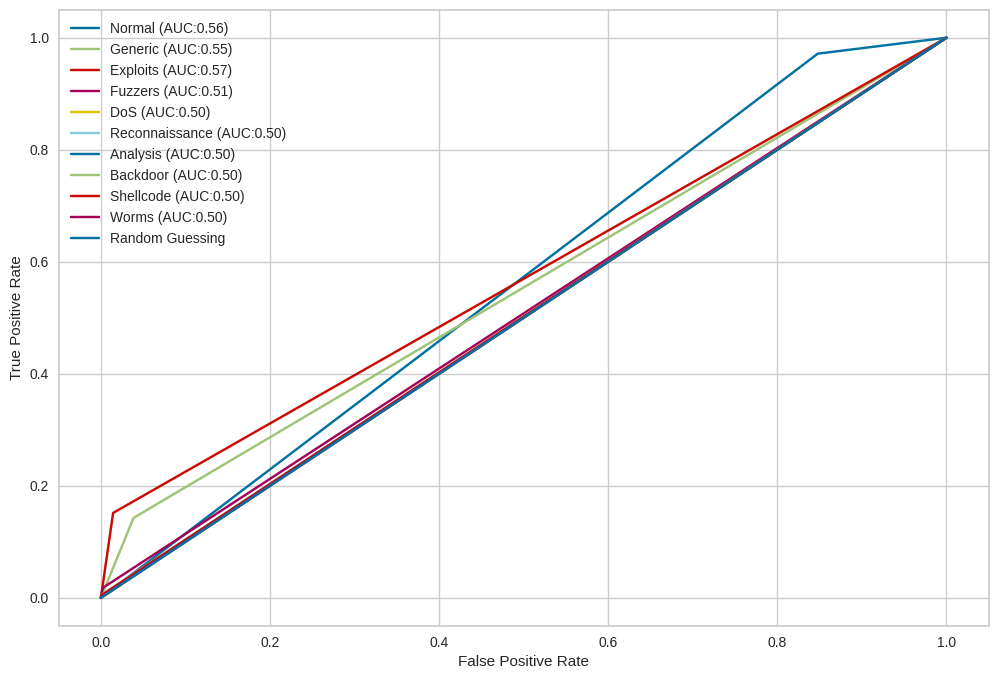

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

Accuracies plots

In [ ]:
import plotly.express as px
levels = list(res_log.keys())
accuracies = list(res_log.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the logistic regression')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_rf_b.keys())
accuracies = list(res_rf_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the random forest for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_xgb_b.keys())
accuracies = list(res_xgb_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the gradient boosting for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_nn_b.keys())
accuracies = list(res_nn_b.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the neural network for binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_tree.keys())
accuracies = list(res_tree.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the decision tree')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_rf_m.keys())
accuracies = list(res_rf_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the random forest for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_xgb_m.keys())
accuracies = list(res_xgb_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the gradient boosting for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

In [ ]:
levels = list(res_nn_m.keys())
accuracies = list(res_nn_m.values())
finalplot=px.scatter(x=levels,y=accuracies,title='Accuracy levels in the neural network for multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Portion of labels flipped',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()